# colab + unzip

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: download
import kagglehub
# Download latest version
path = kagglehub.dataset_download("artemmmtry/nyu-depth-v2")
print("Path to dataset files:", path)

In [ ]:
# prompt: giai nen /content/drive/MyDrive/KLTN_LeQuangVinh_19503031/GENERAL DATA/sunrgbd.zip vao content

!unzip /content/drive/MyDrive/KLTN_LeQuangVinh_19503031/GENERAL\ DATA/sunrgbd.zip -d /content

Archive:  /content/drive/MyDrive/KLTN_LeQuangVinh_19503031/GENERAL DATA/sunrgbd.zip
replace /content/SUNRGBD/kv1/NYUdata/NYU1235/seg.mat? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import kagglehub
import shutil
path = kagglehub.dataset_download("artemmmtry/nyu-depth-v2")
print("Path to dataset files:", path)
output_filename = '/content/drive/MyDrive/KLTN_LeQuangVinh_19503031/GENERAL DATA/nyu-depth-v2'
shutil.make_archive(output_filename, 'zip', path)

# shutil.move(f'./{output_filename}.zip', f'/content/drive/MyDrive/{output_filename}.zip')

In [ ]:
# prompt: # prompt: Download
# import kagglehub
# import shutil
# path = kagglehub.dataset_download("artemmmtry/nyu-depth-v2")
# print("Path to dataset files:", path)
# output_filename = 'nyu-depth-v2'
# shutil.make_archive(output_filename, 'zip', path)
# chuyển zip vào drive

shutil.move(f'./{output_filename}.zip', f'/content/drive/MyDrive/{output_filename}.zip')

In [ ]:
!unzip "/content/drive/MyDrive/KLTN_LeQuangVinh_19503031/GENERAL DATA/indoors.zip" -d /content

In [ ]:
# prompt: Load đường dẫn các thư mục trong /content/indoors/scene_00000
import glob
import os

loaded_images = []

path = '/content/indoors'
directories = [path + '/' + d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

for path_folder in directories:
    path_scans = [path_folder + '/' + d for d in os.listdir(path_folder) if os.path.isdir(os.path.join(path_folder, d))]

    print(path_folder + ": ", end=' ')
    for scan in path_scans:

        img_files = glob.glob(os.path.join(scan, ('*.png'))) + \
                    glob.glob(os.path.join(scan, ('*.npy')))
        # Load and process each image
        [loaded_images.append(img_path) for img_path in img_files]
        loaded_images.sort(reverse=False)
    print(f"Loaded {len(loaded_images)} png.")


In [ ]:
# prompt: Đọc file /content/indoors/scene_00000/scan_00000/00000_00000_indoors_060_010_depth_mask.npy

import numpy as np

file_path = '/content/indoors/scene_00000/scan_00000/00000_00000_indoors_060_010_depth_mask.npy'

try:
  # Load the .npy file
  data = np.load(file_path)
  print(f"Successfully loaded data from: {file_path}")
  print("Data shape:", data.shape)
  # You can now work with the 'data' numpy array
  # For example, print the first few elements:
  # print("First few elements:\n", data[:5])
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred while loading the file: {e}")


# LOAD NYU

In [1]:
import google.colab
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: giai nen /content/drive/MyDrive/KLTN_LeQuangVinh_19503031/GENERAL DATA/nyu-depth-v2.zip

!unzip /content/drive/MyDrive/KLTN_LeQuangVinh_19503031/GENERAL\ DATA/nyu-depth-v2.zip -d /content

In [2]:
# prompt: load cac duong dan thu muc trong /content/train
import os

train_path = 'E:\\nyu-depth-v2\\train'
train_dirs = [train_path + '/' + d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]
print(f"Directories in {train_path}", len(train_dirs), train_dirs)

Directories in E:\nyu-depth-v2\train 280 ['E:\\nyu-depth-v2\\train/basement_0001a', 'E:\\nyu-depth-v2\\train/basement_0001b', 'E:\\nyu-depth-v2\\train/basement_0001c', 'E:\\nyu-depth-v2\\train/bathroom_0001', 'E:\\nyu-depth-v2\\train/bathroom_0002', 'E:\\nyu-depth-v2\\train/bathroom_0005', 'E:\\nyu-depth-v2\\train/bathroom_0006', 'E:\\nyu-depth-v2\\train/bathroom_0007', 'E:\\nyu-depth-v2\\train/bathroom_0010', 'E:\\nyu-depth-v2\\train/bathroom_0011', 'E:\\nyu-depth-v2\\train/bathroom_0013', 'E:\\nyu-depth-v2\\train/bathroom_0014a', 'E:\\nyu-depth-v2\\train/bathroom_0014b', 'E:\\nyu-depth-v2\\train/bathroom_0016', 'E:\\nyu-depth-v2\\train/bathroom_0019', 'E:\\nyu-depth-v2\\train/bathroom_0023', 'E:\\nyu-depth-v2\\train/bathroom_0024', 'E:\\nyu-depth-v2\\train/bathroom_0028', 'E:\\nyu-depth-v2\\train/bathroom_0030', 'E:\\nyu-depth-v2\\train/bathroom_0033', 'E:\\nyu-depth-v2\\train/bathroom_0034', 'E:\\nyu-depth-v2\\train/bathroom_0035', 'E:\\nyu-depth-v2\\train/bathroom_0039', 'E:\\nyu-d

In [3]:
# prompt: load các file .h5 trong /content/train/basement_0001a
import glob
import h5py
import cv2
import numpy as np

X = []
y = []

for basement_path in train_dirs[30:41]:

    h5_files = glob.glob(os.path.join(basement_path, '*.h5'))

    print(f"Files in {basement_path}:")
    for h5_file in h5_files:
        with h5py.File(h5_file, 'r') as f:
            img_rgb = f['rgb'][:] # Dùng [:] để đọc toàn bộ dữ liệu vào bộ nhớ
            img_d = f['depth'][:]

            img_rgb = np.transpose(img_rgb, (1, 2, 0))
            img_d = np.expand_dims(img_d, -1)

            img_rgb = cv2.resize(img_rgb, (256, 192), interpolation=cv2.INTER_AREA)
            img_d = cv2.resize(img_d, (256, 192), interpolation=cv2.INTER_AREA)

            X.append(img_rgb)
            y.append(img_d)


Files in E:\nyu-depth-v2\train/bathroom_0051:
Files in E:\nyu-depth-v2\train/bathroom_0053:
Files in E:\nyu-depth-v2\train/bathroom_0054:
Files in E:\nyu-depth-v2\train/bathroom_0055:
Files in E:\nyu-depth-v2\train/bathroom_0056:
Files in E:\nyu-depth-v2\train/bathroom_0057:
Files in E:\nyu-depth-v2\train/bedroom_0004:
Files in E:\nyu-depth-v2\train/bedroom_0012:
Files in E:\nyu-depth-v2\train/bedroom_0014:
Files in E:\nyu-depth-v2\train/bedroom_0015:
Files in E:\nyu-depth-v2\train/bedroom_0016:


Ảnh đã đọc có shape: (3, 480, 640)
Nhãn của ảnh: (480, 640)


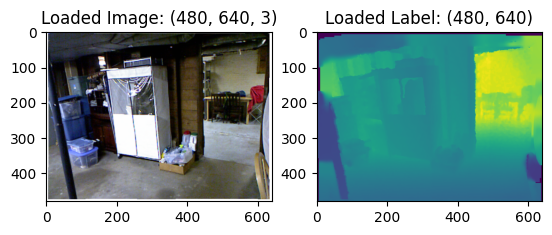

In [107]:
import h5py
import numpy as np
from PIL import Image # Để đọc/ghi ảnh thực tế

# --- Đọc ảnh từ file .h5 ---
with h5py.File('/content/train/basement_0001a/00006.h5', 'r') as f:
    # Truy cập dataset 'image_1'
    img_rgb = f['rgb'][:] # Dùng [:] để đọc toàn bộ dữ liệu vào bộ nhớ
    img_d = f['depth'][:]

print(f"Ảnh đã đọc có shape: {img_rgb.shape}")
print(f"Nhãn của ảnh: {img_d.shape}")

from matplotlib import pyplot as plt
plt.subplot(121)
img_rgb = np.transpose(img_rgb, (1, 2, 0))
plt.imshow(img_rgb)
plt.title(f"Loaded Image: {img_rgb.shape}")

plt.subplot(122)
plt.imshow(img_d)
plt.title(f"Loaded Label: {img_d.shape}")

plt.show()

Ảnh sau khi chuyển đổi có shape: (480, 640, 3)


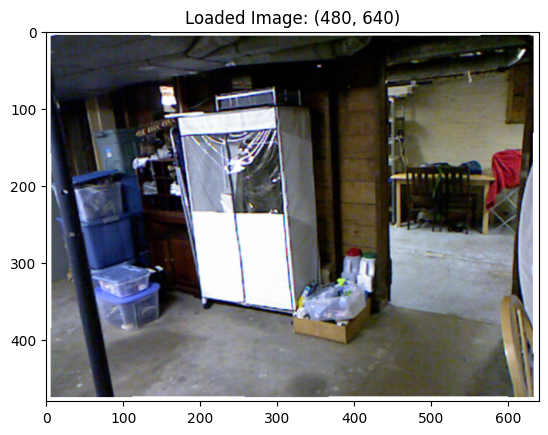

In [108]:
# prompt: chuyển đổi (3, 480, 640) thành (480, 640, 3)

# Convert the shape from (3, 480, 640) to (480, 640, 3)
loaded_image_data_transposed = np.transpose(loaded_image_data, (1, 2, 0))

print(f"Ảnh sau khi chuyển đổi có shape: {loaded_image_data_transposed.shape}")

plt.imshow(loaded_image_data_transposed)
plt.title(f"Loaded Image: {loaded_label.shape}")
plt.show()

In [ ]:
# !unzip "/content/drive/MyDrive/KLTN_LeQuangVinh_19503031/GENERAL DATA/sunrgbd.zip" -d /content

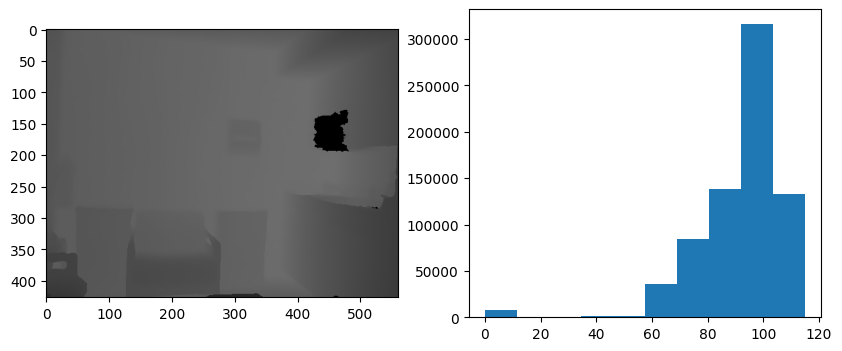

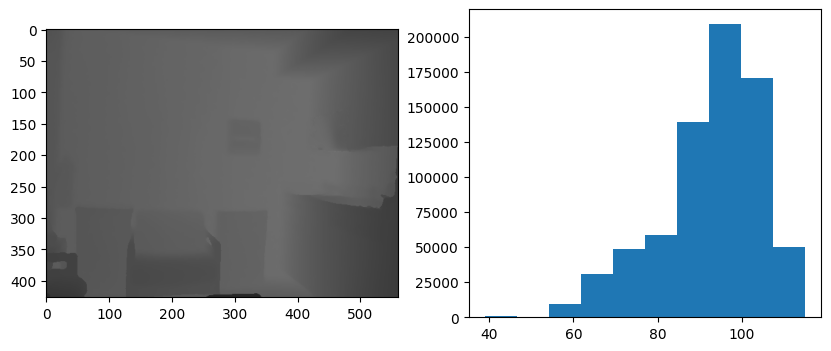

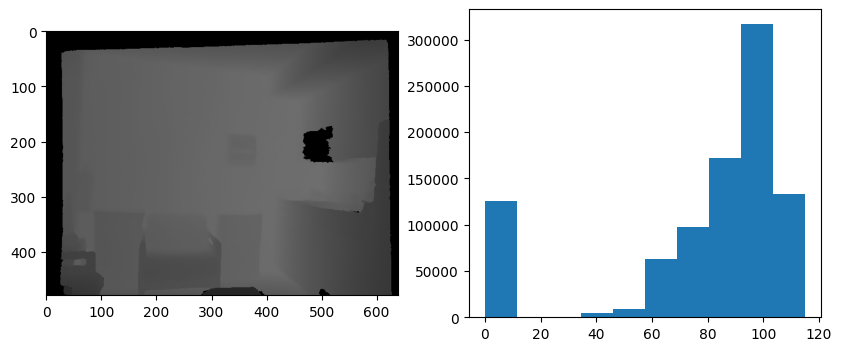

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
img = cv2.imread('/content/SUNRGBD/kv1/NYUdata/NYU0001/depth/NYU0001.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.hist(img.flatten())
plt.show()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
img = cv2.imread('/content/SUNRGBD/kv1/NYUdata/NYU0001/depth_bfx/NYU0001.png') #
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.hist(img.flatten())
plt.show()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
img = cv2.imread('/content/SUNRGBD/kv1/NYUdata/NYU0001/fullres/NYU0001.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.hist(img.flatten())
plt.show()
plt.show()


In [ ]:
import os

path = '/content/SUNRGBD/kv1/NYUdata/'
path = '/content/SUNRGBD/kv2/align_kv2'
path = '/content/SUNRGBD/kv2/kinect2data'
directories = [path + '/' + d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

print("Folders in", path)
len(directories)

extrinsics_paths = []
for root, dirs, files in os.walk(path):
  find_name_folder = 'image'
#   find_name_folder = 'depth_bfx'
  if find_name_folder in dirs:
    extrinsics_paths.append(os.path.join(root, find_name_folder))

print("Paths to 'extrinsics' folders:")
len(extrinsics_paths)

Folders in /content/SUNRGBD/kv2/kinect2data
Paths to 'extrinsics' folders:


3485

In [ ]:
import glob

rgb_img_paths = []
depth_img_paths = []

for base_dir in extrinsics_paths:
  # Get all jpg and png files in the directory
  all_files = glob.glob(os.path.join(base_dir, '*.jpg')) + \
              glob.glob(os.path.join(base_dir, '*.png'))

  # Sort the files to maintain consistent order
  all_files.sort()

  # Separate into jpg and png lists, maintaining the sorted order
  for file_path in all_files:
    if file_path.endswith('.jpg'):
      rgb_img_paths.append(file_path)
    elif file_path.endswith('.png'):
      depth_img_paths.append(file_path)

print("Paths to jpg files in 'extrinsics' folders:")
print(rgb_img_paths[:10]) # Print first 10 for brevity
print(f"Total jpg files: {len(rgb_img_paths)}")

print("\nPaths to png files in 'extrinsics' folders:")
print(depth_img_paths[:10]) # Print first 10 for brevity
print(f"Total png files: {len(depth_img_paths)}")

Paths to jpg files in 'extrinsics' folders:
['/content/SUNRGBD/kv2/kinect2data/000052_2014-05-26_15-04-25_260595134347_rgbf000069-resize/image/0000069.jpg', '/content/SUNRGBD/kv2/kinect2data/002067_2014-06-24_21-42-56_260595134347_rgbf000015-resize/image/0000015.jpg', '/content/SUNRGBD/kv2/kinect2data/003612_2014-05-23_18-01-59_094959634447_rgbf000101-resize/image/0000101.jpg', '/content/SUNRGBD/kv2/kinect2data/002132_2014-06-25_21-12-39_260595134347_rgbf000085-resize/image/0000085.jpg', '/content/SUNRGBD/kv2/kinect2data/002414_2014-06-28_20-24-58_260595134347_rgbf000067-resize/image/0000067.jpg', '/content/SUNRGBD/kv2/kinect2data/002938_2014-06-26_15-53-46_094959634447_rgbf000077-resize/image/0000077.jpg', '/content/SUNRGBD/kv2/kinect2data/001454_2014-06-19_17-06-17_260595134347_rgbf000104-resize/image/0000104.jpg', '/content/SUNRGBD/kv2/kinect2data/002545_2014-06-24_13-38-53_094959634447_rgbf000080-resize/image/0000080.jpg', '/content/SUNRGBD/kv2/kinect2data/003014_2014-06-15_12-58-2

In [ ]:
import os

path = '/content/SUNRGBD/kv1/NYUdata/'
path = '/content/SUNRGBD/kv2/align_kv2'
path = '/content/SUNRGBD/kv2/kinect2data'
directories = [path + '/' + d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

print("Folders in", path)
len(directories)

extrinsics_paths = []
for root, dirs, files in os.walk(path):
#   find_name_folder = 'image'
  find_name_folder = 'depth_bfx'
  if find_name_folder in dirs:
    extrinsics_paths.append(os.path.join(root, find_name_folder))

print("Paths to 'extrinsics' folders:")
len(extrinsics_paths)

Folders in /content/SUNRGBD/kv2/kinect2data
Paths to 'extrinsics' folders:


3485

In [ ]:
import glob

for base_dir in extrinsics_paths:
  # Get all jpg and png files in the directory
  all_files = glob.glob(os.path.join(base_dir, '*.jpg')) + \
              glob.glob(os.path.join(base_dir, '*.png'))

  # Sort the files to maintain consistent order
  all_files.sort()

  # Separate into jpg and png lists, maintaining the sorted order
  for file_path in all_files:
    if file_path.endswith('.jpg'):
      rgb_img_paths.append(file_path)
    elif file_path.endswith('.png'):
      depth_img_paths.append(file_path)

print("Paths to jpg files in 'extrinsics' folders:")
print(rgb_img_paths[:10]) # Print first 10 for brevity
print(f"Total jpg files: {len(rgb_img_paths)}")

print("\nPaths to png files in 'extrinsics' folders:")
print(depth_img_paths[:10]) # Print first 10 for brevity
print(f"Total png files: {len(depth_img_paths)}")

Paths to jpg files in 'extrinsics' folders:
['/content/SUNRGBD/kv2/kinect2data/000052_2014-05-26_15-04-25_260595134347_rgbf000069-resize/image/0000069.jpg', '/content/SUNRGBD/kv2/kinect2data/002067_2014-06-24_21-42-56_260595134347_rgbf000015-resize/image/0000015.jpg', '/content/SUNRGBD/kv2/kinect2data/003612_2014-05-23_18-01-59_094959634447_rgbf000101-resize/image/0000101.jpg', '/content/SUNRGBD/kv2/kinect2data/002132_2014-06-25_21-12-39_260595134347_rgbf000085-resize/image/0000085.jpg', '/content/SUNRGBD/kv2/kinect2data/002414_2014-06-28_20-24-58_260595134347_rgbf000067-resize/image/0000067.jpg', '/content/SUNRGBD/kv2/kinect2data/002938_2014-06-26_15-53-46_094959634447_rgbf000077-resize/image/0000077.jpg', '/content/SUNRGBD/kv2/kinect2data/001454_2014-06-19_17-06-17_260595134347_rgbf000104-resize/image/0000104.jpg', '/content/SUNRGBD/kv2/kinect2data/002545_2014-06-24_13-38-53_094959634447_rgbf000080-resize/image/0000080.jpg', '/content/SUNRGBD/kv2/kinect2data/003014_2014-06-15_12-58-2

In [ ]:
import cv2, numpy as np

# Load RGB images into X
X = []
for img_path in rgb_img_paths:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
    X.append(img)

X = np.array(X)
print(f"Shape of X (RGB images): {X.shape}")

# Load Depth images into y
y = []
for img_path in depth_img_paths:
    # Read depth as grayscale if it's a single channel depth map
    # Or read as color if it's stored as a color image (like the NYU dataset example)
    # Adjust the reading method based on the actual format of your depth images
    depth_img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED) # Read as is, potentially 16-bit
    y.append(depth_img)

y = np.array(y)
print(f"Shape of y (Depth images): {y.shape}")
y_cop = y

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

X = []
y = []

[
    (
    X.append(cv2.resize(cv2.imread(loaded_images[index]), (512, 384), interpolation=cv2.INTER_AREA)),
    y.append(np.load(loaded_images[index+1]).astype(np.float32))
    ) for index in range(3600, 3 * 300 + 3600, 3)
]

y_cop = y

In [4]:
np.array(X).shape, np.array(y).shape

((1373, 192, 256, 3), (1373, 192, 256))

In [41]:
def remove_outliers_per_image_quantile(images, quantile_thresh=0.99):
    """
    Loại bỏ các điểm ảnh ngoại lai trong mỗi ảnh bằng phương pháp phân vị.
    Các điểm ảnh có giá trị nằm ngoài khoảng (1 - quantile_thresh) và quantile_thresh
    sẽ được thay bằng giá trị trung vị của ảnh.
    images: numpy array, shape (N, H, W) hoặc (N, H, W, 1)
    quantile_thresh: ngưỡng phân vị để xác định ngoại lai (ví dụ: 0.99 cho 99th percentile)
    """
    images_out = []
    for img in images:
        img_flat = img.flatten()

        # Tính toán các ngưỡng phân vị dưới và trên
        # lower_bound = np.quantile(img_flat, 1 - quantile_thresh)
        upper_bound = np.quantile(img_flat, quantile_thresh)

        # Tính giá trị trung vị để thay thế các ngoại lai
        median_val = np.median(img_flat)

        # Tạo mặt nạ cho các điểm ảnh ngoại lai
        # Các giá trị nhỏ hơn lower_bound hoặc lớn hơn upper_bound được coi là ngoại lai
        mask = (img_flat >= upper_bound)

        # Thay thế các điểm ảnh ngoại lai bằng giá trị trung vị
        img_flat[mask] = median_val

        # Đưa hình ảnh phẳng trở lại hình dạng ban đầu
        img_out = img_flat.reshape(img.shape)
        images_out.append(img_out)

    return np.array(images_out)


def remove_outliers_per_image(images, z_thresh=10.0):
    """
    Loại bỏ các điểm ảnh ngoại lai trong mỗi ảnh bằng phương pháp z-score.
    Các điểm ảnh có z-score > z_thresh sẽ được thay bằng giá trị trung vị của ảnh.
    images: numpy array, shape (N, H, W) hoặc (N, H, W, 1)
    z_thresh: ngưỡng z-score để xác định ngoại lai
    """
    images_out = []
    for img in images:
        img_flat = img.flatten()
        mean = np.mean(img_flat)
        std = np.std(img_flat)
        if std == 0:
            images_out.append(img)
            continue
        z_scores = (img_flat - mean) / std
        mask = np.abs(z_scores) > z_thresh
        img_flat[mask] = np.median(img_flat)
        img_out = img_flat.reshape(img.shape)
        images_out.append(img_out)
    return np.array(images_out)

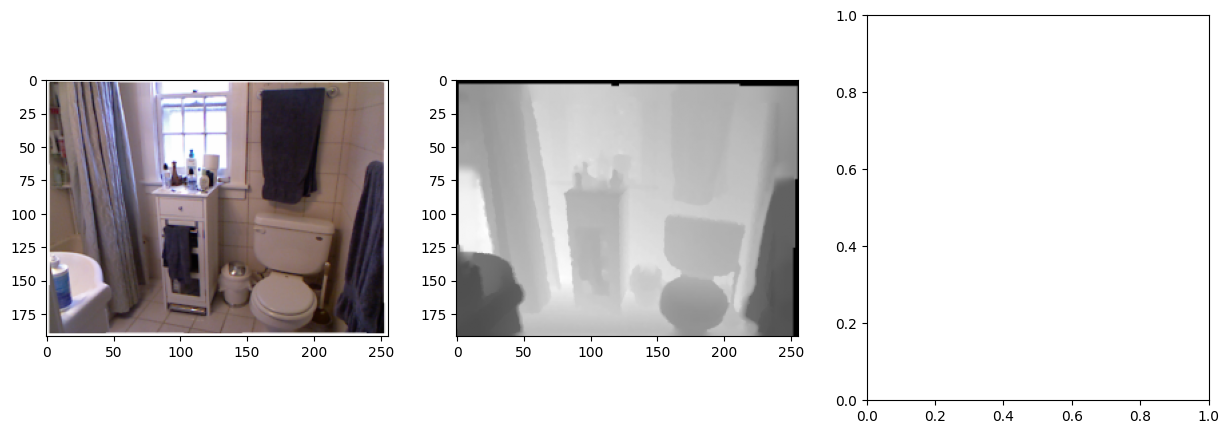

In [8]:
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

plt.figure(figsize=(15, 5))

index = 100

plt.subplot(1, 3, 1)
plt.imshow(X[index])

plt.subplot(1, 3, 2)
plt.imshow(y[index], cmap='gray')

plt.subplot(1, 3, 3)
# plt.imshow(remove_outliers_per_image_quantile(y[index], quantile_thresh=0.98), cmap='gray')

plt.show()

In [5]:
# y = remove_outliers_per_image(y_cop, z_thresh=20.0)
X = [cv2.GaussianBlur(image, (5, 5), 0) for image in X]
# y = [cv2.resize(image, (256, 192), interpolation=cv2.INTER_AREA) for image in y]
X = (X / np.max(X)).astype(np.float32)
y = (y / np.max(y)).astype(np.float32)
y = np.expand_dims(y, -1)
X.shape, y.shape

((1373, 192, 256, 3), (1373, 192, 256, 1))

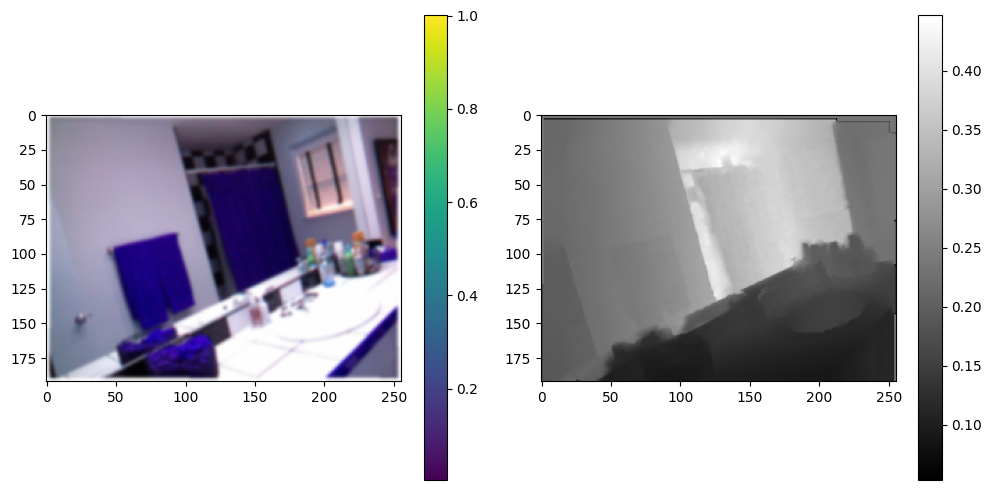

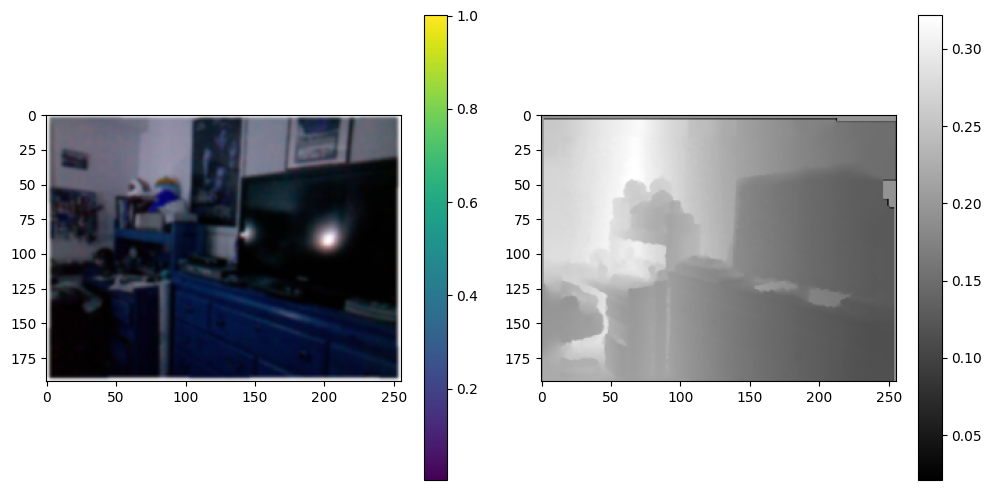

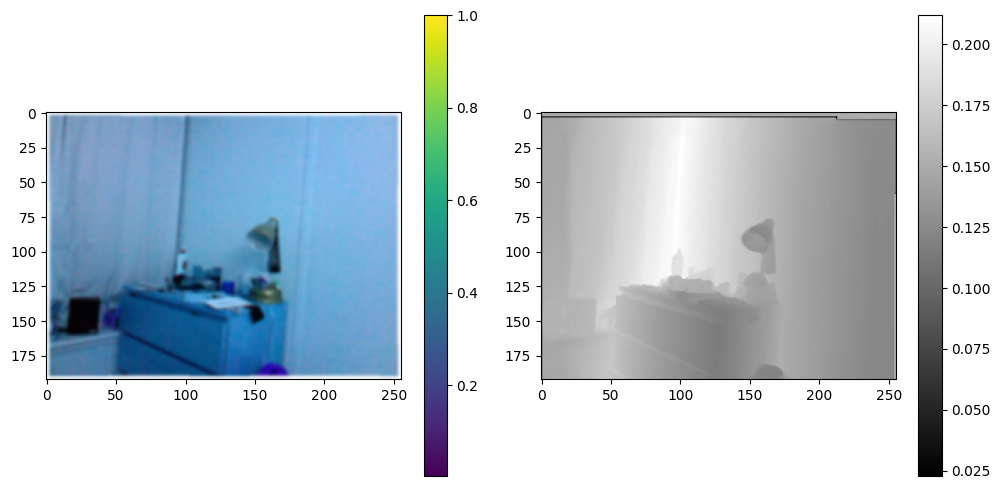

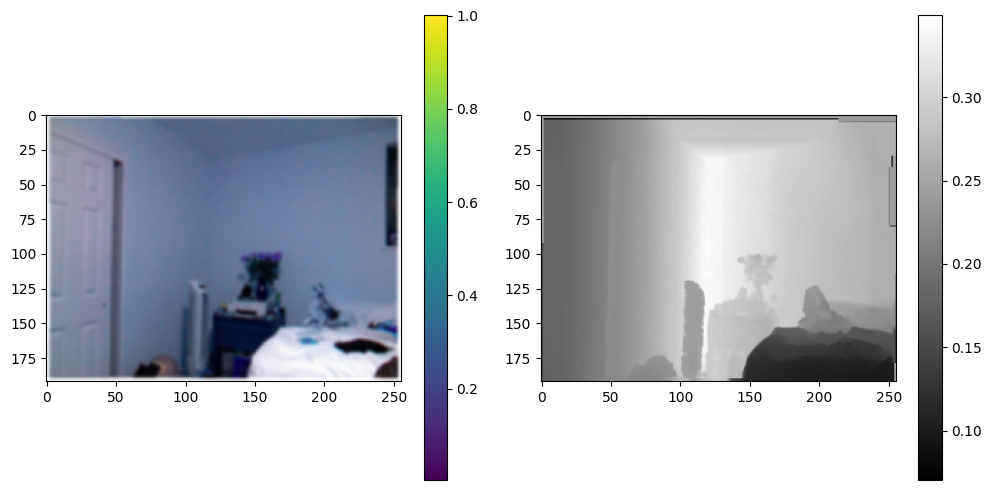

In [11]:
for path_img in range(0, len(y), len(y) // 3):

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    im_depth = plt.imshow(X[path_img][...,::-1])
    plt.colorbar(im_depth)

    plt.subplot(1, 3, 2)
    y[path_img][y[path_img] == 0] = np.mean(y[path_img])
    im_depth = plt.imshow(y[path_img], cmap='gray')
    plt.colorbar(im_depth)

    plt.tight_layout()
    plt.show()

In [6]:
np.max(X), np.max(y)

(np.float32(1.0), np.float32(1.0))

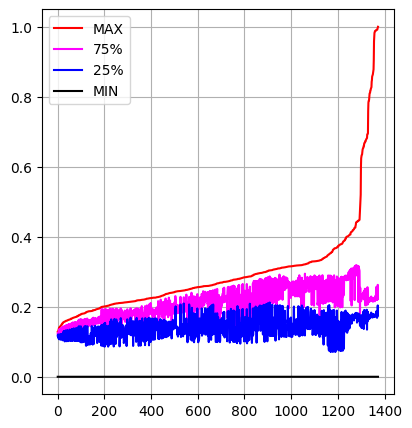

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def describe_Image(image):
    df = pd.DataFrame(np.squeeze(image).flatten()).describe()
    return df[0].to_dict()

max_values_y_test = np.array([np.max(x) for x in y])
sort_indices = np.argsort(max_values_y_test)

y_test_sorted = np.array(y)[sort_indices]

_median = [np.median(x) for x in y_test_sorted]
y_des = [describe_Image(x) for x in y_test_sorted]

plt.figure(figsize=(10, 5))
plt.subplot(121)
# Biểu đồ 1: Đường
plt.plot(range(len(y_test_sorted)), [item['max'] for item in y_des], label='MAX', color='red')
plt.plot(range(len(y_test_sorted)), [item['75%'] for item in y_des], label='75%', color='magenta')
plt.plot(range(len(y_test_sorted)), [item['25%'] for item in y_des], label='25%', color='blue')
plt.plot(range(len(y_test_sorted)), [item['min'] for item in y_des], label='MIN', color='black')
plt.legend(loc='upper left')
plt.grid(True)

# max_values_y_test = np.array([np.max(x) for x in y])
# sort_indices = np.argsort(max_values_y_test)

# y_test_sorted = np.array(y)[sort_indices]

# _median = [np.median(x) for x in y_test_sorted]
# y_des = [describe_Image(x) for x in y_test_sorted]

# plt.subplot(122)
# # plt.figure(figsize=(20, 15))
# # Biểu đồ 1: Đường
# plt.plot(range(len(y_test_sorted)), [item['max'] for item in y_des], label='MAX', color='red')
# plt.plot(range(len(y_test_sorted)), [item['75%'] for item in y_des], label='75%', color='magenta')
# plt.plot(range(len(y_test_sorted)), [item['25%'] for item in y_des], label='25%', color='blue')
# plt.plot(range(len(y_test_sorted)), [item['min'] for item in y_des], label='MIN', color='black')

# plt.legend(loc='upper left')
# plt.grid(True)

plt.show()

# DONE LOAD NYU

# load path

In [ ]:
import os
import numpy as np

directory_path = "/content/Linemod_preprocessed/data" # đường dẫn ổ đĩa drive colab
# directory_path = "../data/Linemod_preprocessed/data" # đường dẫn ổ đĩa PC
folder_dir = []

if os.path.exists(directory_path) and os.path.isdir(directory_path):
  for item in os.listdir(directory_path):
    item_path = os.path.join(directory_path, item)
    if os.path.isdir(item_path):
      folder_dir.append(item_path)
else:
  print(f"The directory '{directory_path}' does not exist or is not a directory.")

folder_dir.sort()
folder_test = [folder_dir[1]]
folder_train = [folder_dir[0]] + folder_dir[2:]
print('All Folder: ', folder_dir)
print('Folder test: ', folder_test)
print('Folder train', folder_train)
print()

# # Lấy tên file
# rgb_dir_train = []
# depth_dir_train = []
# rgb_dir_test = []
# depth_dir_test = []

# load path train & validation

In [ ]:
def get_path_folder(folder_dir):
    rgb_dir = []
    depth_dir = []

    for item in folder_dir:
        path_rgb = os.path.join(item, 'rgb')
        path_depth = os.path.join(item, 'depth')

        lt1 = os.listdir(path_rgb)
        lt2 = os.listdir(path_depth)

        lt1.sort()
        lt2.sort()

        if len(lt1) == len(lt2):
            print(len(lt1), path_rgb, lt1)
            print(len(lt2), path_depth, lt2)

            print()

            # Tạo danh sách đường dẫn các ảnh rgb và ảnh depth
            for i in range(len(lt1)):
                rgb_dir.append(os.path.join(path_rgb, lt1[i]))
                depth_dir.append(os.path.join(path_depth, lt2[i]))

    # nối 2 danh sáh đường dẫn
    return np.column_stack((np.array(rgb_dir), np.array(depth_dir)))

matrix_train = get_path_folder(folder_train)
matrix_train.shape

# load path test

In [ ]:
rgb_dir = []
depth_dir = []
mask_dir = []

for item in folder_test:
    path_rgb = os.path.join(item, 'rgb')
    path_depth = os.path.join(item, 'depth')
    path_mask = os.path.join(item, 'mask_all')

    lt1 = os.listdir(path_rgb)
    lt2 = os.listdir(path_depth)
    lt3 = os.listdir(path_mask)

    lt1.sort()
    lt2.sort()
    lt3.sort()

    if len(lt1) == len(lt2):
        print(path_rgb, len(lt1), lt1)
        print(path_depth, len(lt2), lt2)
        print(path_mask, len(lt3), lt3)

        print()

        # Tạo danh sách đường dẫn các ảnh rgb và ảnh depth
        for i in range(len(lt1)):
            rgb_dir.append(os.path.join(path_rgb, lt1[i]))
            depth_dir.append(os.path.join(path_depth, lt2[i]))
            mask_dir.append(os.path.join(path_mask, lt3[i]))

matrix_test = np.column_stack((np.array(rgb_dir), np.array(depth_dir), np.array(mask_dir)))
matrix_test.shape

# visual originnal image

In [ ]:
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

# Giả sử matrix là ma trận chứa đường dẫn đến các ảnh
for i in range(0, matrix_train.shape[0], matrix_train.shape[0] // 3):
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Ảnh thứ {i}: {matrix_train[i, 0]}', fontsize=16)

    # Hiển thị ảnh thứ nhất với colorbar
    plt.subplot(1, 2, 1)
    img1 = cv2.imread(matrix_train[i, 0], 1)
    im1 = plt.imshow(img1)
    plt.colorbar(im1)
    plt.axis('off')

    # Hiển thị ảnh thứ hai với colorbar
    plt.subplot(1, 2, 2)
    img2 = cv2.imread(matrix_train[i, 1], -1)
    im2 = plt.imshow(img2)
    plt.colorbar(im2)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# choice size

In [ ]:
x, y = img2.shape
width, height = int(x * 0.4), int(y * 0.4)
width, height

# load X & y | X_test & y_test

In [ ]:
X = []
y = []

import cv2
import numpy as np
import matplotlib.pyplot as plt

for i in range(0, matrix_train.shape[0]):

    if i % 600 == 0:
      print(i, end=' ')

    # if i <= 4800:
    #   continue
    if i >= 4800:
      break

    rgb_path = matrix_train[i, 0]
    depth_path = matrix_train[i, 1]

    # Read images using cv2
    img_rgb = cv2.imread(rgb_path)
    img_depth = cv2.imread(depth_path, cv2.IMREAD_UNCHANGED) # Keep depth as is

    if img_rgb is not None and img_depth is not None:
      img_rgb = cv2.resize(img_rgb, (height, width), interpolation=cv2.INTER_AREA)
      img_depth = cv2.resize(img_depth, (height, width), interpolation=cv2.INTER_AREA)

      X.append(img_rgb)
      y.append(img_depth)

    else:
      print(f"Error loading images at index {i}")

X = np.array(X)
y = np.array(y)

print()

X_test = []
y_test = []

import cv2
import numpy as np
import matplotlib.pyplot as plt

for i in range(0, matrix_test.shape[0]):
    rgb_path = matrix_test[i, 0]
    depth_path = matrix_test[i, 1]

    if i % 200 == 0:
      print(i, end=' ')

    # Read images using cv2
    img_rgb = cv2.imread(rgb_path)
    # Khong thay doi gia tri anh depth .png
    img_depth = cv2.imread(depth_path, cv2.IMREAD_UNCHANGED) # Keep depth as is

    if img_rgb is not None and img_depth is not None:
      img_rgb = cv2.resize(img_rgb, (height, width), interpolation=cv2.INTER_AREA)
      img_depth = cv2.resize(img_depth, (height, width), interpolation=cv2.INTER_AREA)

      X_test.append(img_rgb)
      y_test.append(img_depth)

    else:
      print(f"Error loading images at index {i}")

X_test = np.array(X_test)
y_test = np.array(y_test)

print()
print(X.shape, y.shape)
print(X_test.shape, y_test.shape)



# Scale values dataset

In [ ]:
resized_X = []
kernel_size = (3, 3)

for image in X:
  dst = cv2.GaussianBlur(image, (3, 3), 0)
  resized_X.append(dst)

X = (np.array(resized_X) / 255.0).astype(np.float32)
resized_X = None

resized_X = []
for image in X_test:
  dst = cv2.GaussianBlur(image, kernel_size, 0)
  resized_X.append(dst)

X_test = (np.array(resized_X) / 255.0).astype(np.float32)
# Xóa bộ nhớ
resized_X = None

max_depth_y = np.max(y)
max_depth_y_test = np.max(y_test)
print(max_depth_y, max_depth_y_test)

y = (y / max_depth_y).astype(np.float32)
y_test = (y_test / max_depth_y_test).astype(np.float32)

max_depth_y_process = np.max(y)
max_depth_y_test_process = np.max(y_test)
print(max_depth_y_process, max_depth_y_test_process)

# process label

In [ ]:
import cv2
import numpy as np

def blur_median_label(y:np.array):
    y_median = []
    for i in range(y.shape[0]):
        img = y[i]
        # Nếu có thêm chiều kênh cuối (ví dụ (N, H, W, 1)), loại bỏ chiều này
        if img.ndim == 3 and img.shape[-1] == 1:
            img = np.squeeze(img, axis=-1)
        # Chuyển về uint8 để medianBlur hoạt động
        img_med = cv2.medianBlur(img, 3)
        y_median.append(img_med)
    return np.array(y_median)

y = blur_median_label(y).astype(np.float32)
# y_test = blur_median_label(y_test).astype(np.float32)

# y = np.expand_dims(np.squeeze(y), -1)
# y_test = np.expand_dims(np.squeeze(y_test), -1)

# visual train image

In [ ]:
X_train

In [ ]:
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

# Giả sử matrix là ma trận chứa đường dẫn đến các ảnh
for i in range(0, len(X_train), (len(X_train) // 2) -1 ):
    plt.figure(figsize=(8,6))

    # Hiển thị ảnh thứ nhất với colorbar
    img1 = X[i]
    plt.title(f"RGB Origin")
    im1 = plt.imshow(img1)
    plt.colorbar(im1)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 6))
    # Hiển thị ảnh thứ hai với colorbar
    img2 = y[i]
    plt.title(f"Label")
    im2 = plt.imshow(img2)
    plt.colorbar(im2)

    plt.tight_layout()
    plt.show()

# Visualization image test

In [ ]:
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

# Giả sử matrix là ma trận chứa đường dẫn đến các ảnh
for i in range(0, X.shape[0],  (X.shape[0] // 2) - 1):

    plt.figure(figsize=(8, 6))
    # Hiển thị ảnh thứ nhất với colorbar
    img1 = X[i]
    plt.title(f'GT')
    im1 = plt.imshow(img1)
    plt.colorbar(im1)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 6))
    # Hiển thị ảnh thứ hai với colorbar
    img2 = y[i]
    plt.title(f'Label')
    im2 = plt.imshow(img2)
    plt.colorbar(im2)

    plt.tight_layout()
    plt.show()

# Split data

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

# y = np.expand_dims(np.squeeze(y), -1)
# y_test = np.expand_dims(np.squeeze(y_test), -1)

print(np.array(X).shape, y.shape)
print()

# Split data into train, test, and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_val, y_val, test_size=0.5)

print(f"Train set size: { X_train.shape}, {y_train.shape}")
print("Validation set size:", {X_val.shape}, {y_val.shape})
print("Test set size:", {X_test.shape}, {y_test.shape})

X, y = None, None
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

(1373, 192, 256, 3) (1373, 192, 256, 1)

Train set size: (1235, 192, 256, 3), (1235, 192, 256, 1)
Validation set size: {(69, 192, 256, 3)} {(69, 192, 256, 1)}
Test set size: {(69, 192, 256, 3)} {(69, 192, 256, 1)}


((1235, 192, 256, 3),
 (1235, 192, 256, 1),
 (69, 192, 256, 3),
 (69, 192, 256, 1),
 (69, 192, 256, 3),
 (69, 192, 256, 1))

# PAPER 4: [Dense-U-net: Dense encoder–decoder network for holographic imaging of 3D particle fields. In Optics Communications Volume 493, 15 August 2021, 126970](https://github.com/THUHoloLab/Dense-U-net)

## Dense Unet

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
import keras.backend as K # Still using K.image_data_format for channel axis

def Conv_Block(input_tensor, filters, bottleneck=False, weight_decay=1e-4):
    """ Encapsulates a convolutional block.

    :param input_tensor: Input tensor
    :param filters: Number of convolution filters
    :param bottleneck: Whether to use a bottleneck layer (currently commented out)
    :param weight_decay: L2 regularization rate
    :return: Output tensor of the convolutional block
    """
    concat_axis = 1 if K.image_data_format() == 'channels_first' else -1  # Determine channel axis

    x = BatchNormalization(axis=concat_axis, epsilon=1.1e-5)(input_tensor)
    x = Activation('relu')(x)

    if bottleneck:
        # Use bottleneck for dimensionality reduction
        inter_channel = filters
        x = Conv2D(inter_channel, (1, 1),
                   kernel_initializer='he_normal',
                   padding='same', use_bias=False,
                   kernel_regularizer=l2(weight_decay))(x)
        x = BatchNormalization(axis=concat_axis, epsilon=1.1e-5)(x)
        x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), kernel_initializer='he_normal', padding='same', use_bias=False)(x)

    return x

def dens_block(input_tensor, nb_filter):
    x1 = Conv_Block(input_tensor, nb_filter)
    add1 = concatenate([x1, input_tensor], axis=-1) # Assuming channels_last
    x2 = Conv_Block(add1, nb_filter)
    add2 = concatenate([x1, input_tensor, x2], axis=-1) # Assuming channels_last
    x3 = Conv_Block(add2, nb_filter)
    return x3

# Model definition
def unet(input_shape=(192, 256, 3)):

    inputs = Input(input_shape)
    x = Conv2D(32, 7, kernel_initializer='he_normal', padding='same', strides=1, use_bias=False, kernel_regularizer=l2(1e-4))(inputs)

    # Downsampling path
    down1 = dens_block(x, nb_filter=32)
    pool1 = MaxPooling2D(pool_size=(2, 2))(down1) # 256x256

    down2 = dens_block(pool1, nb_filter=64)
    pool2 = MaxPooling2D(pool_size=(2, 2))(down2) # 128x128

    down3 = dens_block(pool2, nb_filter=128)
    pool3 = MaxPooling2D(pool_size=(2, 2))(down3) # 64x64

    down4 = dens_block(pool3, nb_filter=256)
    pool4 = MaxPooling2D(pool_size=(2, 2))(down4) # 32x32

    # Bottleneck
    conv5 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Upsampling path
    up6 = UpSampling2D(size=(2, 2))(drop5)
    # Ensure concatenation axis is correct (always -1 for channels_last in typical setups)
    add6 = concatenate([down4, up6], axis=-1) # Changed axis from 3 to -1 for generality
    up6 = dens_block(add6, nb_filter=256)

    up7 = UpSampling2D(size=(2, 2))(up6)
    add7 = concatenate([down3, up7], axis=-1) # Changed axis from 3 to -1
    up7 = dens_block(add7, nb_filter=128)

    up8 = UpSampling2D(size=(2, 2))(up7)
    add8 = concatenate([down2, up8], axis=-1)
    up8 = dens_block(add8, nb_filter=64)

    up9 = UpSampling2D(size=(2, 2))(up8)
    add9 = concatenate([down1, up9], axis=-1)
    up9 = dens_block(add9, nb_filter=64)

    # Output head
    conv10 = Conv2D(32, 7, strides=1, activation='relu', padding='same', kernel_initializer='he_normal')(up9)
    conv10 = Conv2D(1, 1, activation='sigmoid')(conv10)

    # Fix: Pass inputs and outputs as positional arguments or using 'inputs'/'outputs' keywords
    model = Model(inputs=inputs, outputs=conv10)

    return model

model = unet(input_shape=(240, 320, 3))
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 240, 320,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 240, 320,  │      4,704 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 240, 320,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 240, 320,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 240, 320,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 240, 320,  │          0 │ conv2d_1[0][0],   │
│ (Concatenate)       │ 64)               │            │ conv2d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 240, 320,  │        256 │ concatenate[0][0] │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 240, 320,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 240, 320,  │     18,432 │ activation_1[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 240, 320,  │          0 │ conv2d_1[0][0],   │
│ (Concatenate)       │ 96)               │            │ conv2d[0][0],     │
│                     │                   │            │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 240, 320,  │        384 │ concatenate_1[0]… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 240, 320,  │          0 │ batch_normalizat… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 240, 320,  │     27,648 │ activation_2[0][… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 120, 160,  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 120, 160,  │        128 │ max_pooling2d[0]… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 120, 160,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 16,782,497 (64.02 MB)

 Trainable params: 16,766,369 (63.96 MB)

 Non-trainable params: 16,128 (63.00 KB)

In [ ]:
!pip install visualkeras

import visualkeras
visualkeras.layered_view(model, legend=True)

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=False,
    show_dtype=True,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=True,
    dpi=50,
    show_layer_activations=True,
    show_trainable=False)

# MODEL ME: "RES_DEN UNET+"

In [ ]:
1e-4

## unet từ paper 4

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Input, concatenate, LeakyReLU, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
import keras.backend as K # Still using K.image_data_format for channel axis
from tensorflow.keras.initializers import HeNormal

def Conv_Block(input_tensor, filters, kernel_size=3):

    concat_axis = 1 if K.image_data_format() == 'channel_first' else -1

    x = BatchNormalization(axis=concat_axis, epsilon=1.1e-5)(input_tensor)
    x = LeakyReLU(0.3)(x)
    x = Conv2D(filters//2, kernel_size=(1,1), kernel_initializer=HeNormal(), padding='same', use_bias=False, activation='relu')(x)

    input_tensor = BatchNormalization(axis=concat_axis, epsilon=1.1e-5)(input_tensor)
    input_tensor = LeakyReLU(0.3)(input_tensor)
    input_tensor = Conv2D(filters//2, kernel_size=kernel_size, kernel_initializer=HeNormal(), padding='same', use_bias=False, activation='relu')(input_tensor)
    input_tensor += x
    input_tensor /= 2


    return input_tensor

def res_dens_block_encoder(input_tensor, nb_filter, pool='max'):
    x1 = Conv_Block(input_tensor, kernel_size=1, filters= nb_filter)
    add1 = Concatenate(axis=-1)([x1, input_tensor])
    x2 = Conv_Block(x1, kernel_size=3, filters= nb_filter)
    skip = Concatenate(axis=-1)([x2, x1, input_tensor])
    skip2 = Conv_Block(skip, kernel_size=3, filters=nb_filter)

    if pool == 'avg':
        pool = MaxPooling2D(pool_size=(2, 2))(skip)
        return pool, skip
    elif pool == 'max':
        pool = MaxPooling2D(pool_size=(2, 2))(skip)
        return pool, skip
    else:
        return skip


def res_dens_block_decoder(input_tensor, skip, nb_filter):

    input_tensor = UpSampling2D(size=(2, 2))(input_tensor)
    add1 = Concatenate(axis=-1)([input_tensor, skip])

    x1 = Conv_Block(add1, kernel_size=1, filters= nb_filter)
    add2 = Concatenate(axis=-1)([x1, input_tensor])
    x2 = Conv_Block(add2, kernel_size=3, filters=nb_filter)

    add2 = Concatenate(axis=-1)([x2, x1, input_tensor])

    x3 = Conv_Block(add2, kernel_size=3, filters=nb_filter)

    return x3

from keras.regularizers import l2

#model definition
def unet(input_shape=(192, 256, 3)):

    filters = 32
    f = [filters, filters*2, filters*4, filters*8, filters*16, filters*32]

    inputs = Input(input_shape)
    x = Conv2D(f[0], 7, kernel_initializer=HeNormal(), padding='same', strides=1,use_bias=False, kernel_regularizer=l2(1e-4))(inputs)

    #down first
    down1, skip1 = res_dens_block_encoder(x, nb_filter=f[0], pool='max')
    #down second
    down2, skip2 = res_dens_block_encoder(down1, nb_filter=f[1], pool='max')
    #down third
    down3, skip3 = res_dens_block_encoder(down2, nb_filter=f[2], pool='max')
    #down four
    down4, skip4 = res_dens_block_encoder(down3, nb_filter=f[3], pool='max')

    #center
    midd = res_dens_block_encoder(down4, nb_filter=f[4], pool=None)

    # up first
    up6 = res_dens_block_decoder(midd, skip4, nb_filter=f[3])
    # up second
    up7 = res_dens_block_decoder(up6, skip3, nb_filter=f[2])
    # up third
    up8 = res_dens_block_decoder(up7, skip2, nb_filter=f[2])
    # up four
    up9 = res_dens_block_decoder(up8, skip1, nb_filter=f[0])

    # output
    conv10 = Conv_Block(up9, kernel_size=7, filters=f[0])

    conv10 = Conv2D(1, 1, activation='sigmoid', padding='same', kernel_initializer=HeNormal())(conv10)

    return Model(inputs=inputs, outputs=conv10)

model = unet((192, 256, 3))
print(model.count_params())
print(len(model.layers))


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\vinh\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\vinh\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\vinh\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\vinh\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\vinh\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\vinh\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\vinh\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\vinh\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\vinh\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\vinh\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\vinh\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\vinh\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [1]:
!pip3 install numpy --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install numpy==1.21.6

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.6 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

In [4]:
!pip install tensorflow==2.12.0

^C


Defaulting to user installation because normal site-packages is not writeable
  Using cached ml_dtypes-0.5.1-cp311-cp311-win_amd64.whl.metadata (22 kB)
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/272.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/272.9 MB ? eta -:--:--
   ---------------------------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\users\\vinh\\appdata\\roaming\\python\\python311\\site-packages\\scipy\\stats\\__pycache__\\_covariance.cpython-311.pyc'



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Activation, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Input, concatenate, LeakyReLU, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
import keras.backend as K # Still using K.image_data_format for channel axis
from tensorflow.keras.initializers import HeNormal

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [ ]:
model.summary()

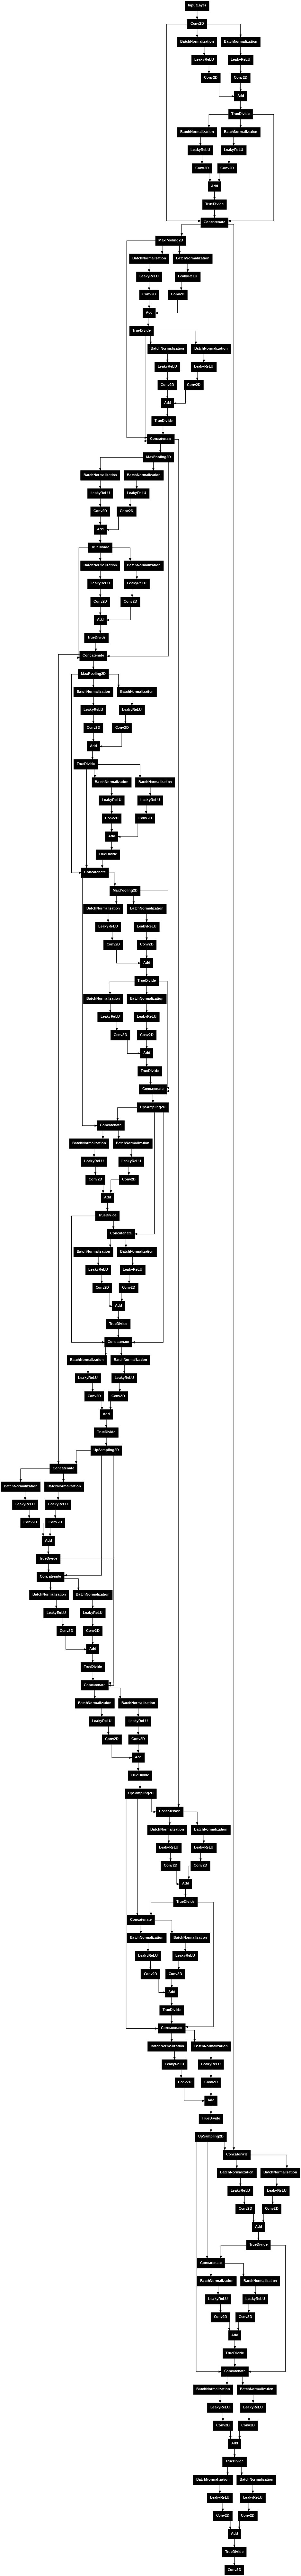

In [191]:
tf.keras.utils.plot_model(
    model,
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=50,
    show_layer_activations=False,
    show_trainable=False)

/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


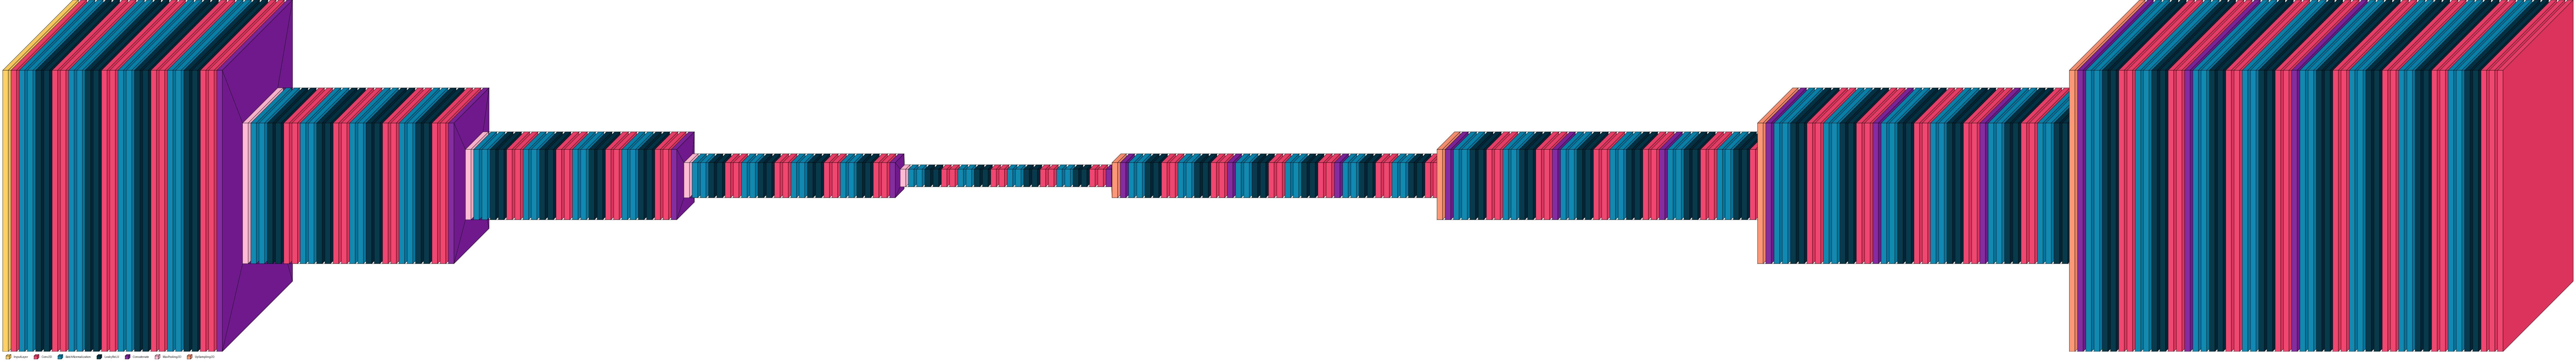

In [175]:
# !pip install visualkeras

import visualkeras
visualkeras.layered_view(model, legend=True, max_z=20)

## unet từ me

10638305
113


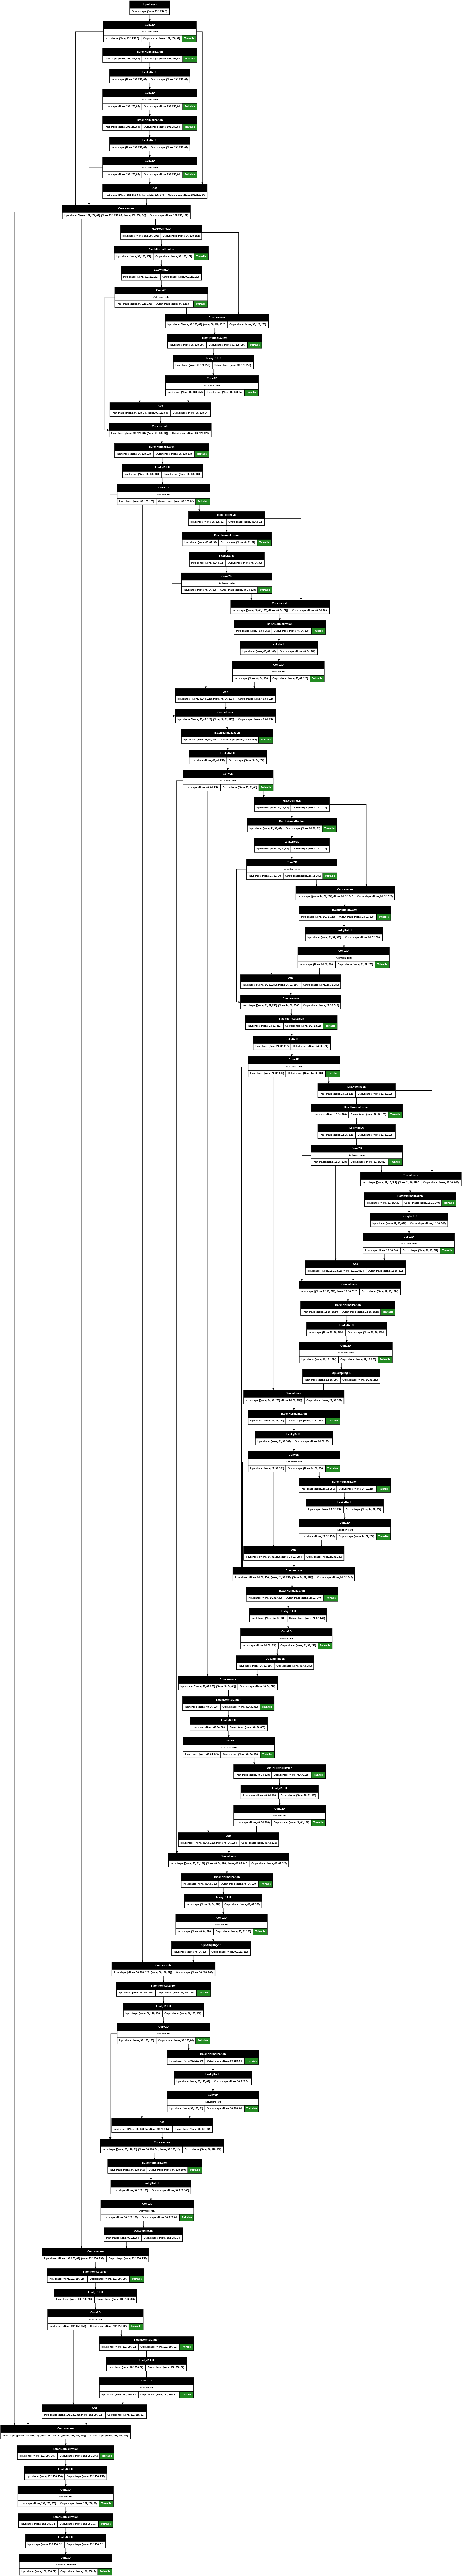

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Concatenate, LeakyReLU, BatchNormalization, MaxPool2D, ReLU, Activation, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D, Add
from tensorflow.keras.initializers import RandomNormal, HeNormal, VarianceScaling, HeUniform, GlorotUniform
import numpy as np

def downscale_block(input_tensor, filters, kernel_size=(3, 3), padding="same", strides=1, max_pool=False):

    if not max_pool:
        conv0 = Conv2D(
            filters=filters * 2,
            kernel_size=np.array(kernel_size) * 2 + 1,
            strides=strides,
            padding=padding,
            activation='relu',
            kernel_initializer=HeUniform(seed=42),
            kernel_regularizer = tf.keras.regularizers.L2(0.1),
            activity_regularizer=tf.keras.regularizers.L2(0.1),
            use_bias=False
            )
        conv1 = Conv2D(
            filters=filters * 2,
            kernel_size=np.array(kernel_size) * 2 + 1,
            strides=strides,
            padding=padding,
            activation='relu',
            kernel_initializer=HeUniform(seed=42),
            kernel_regularizer = tf.keras.regularizers.L2(0.1),
            activity_regularizer=tf.keras.regularizers.L2(0.1),
            use_bias=False)
        pool = MaxPool2D((2, 2), strides=(2, 2), padding='same')
    else:
        pool = MaxPool2D((2, 2), strides=(2, 2), padding='same')

    convA = Conv2D(
        filters= filters,
        kernel_size=np.array(kernel_size) // 2,
        strides=strides,
        padding=padding,
        activation='relu',
        kernel_initializer=HeUniform(seed=42),
        kernel_regularizer = tf.keras.regularizers.L2(0.1),
        activity_regularizer=tf.keras.regularizers.L2(0.1),
        use_bias=False)

    convB = Conv2D(
        filters,
        np.array(kernel_size),
        strides,
        padding,
        activation='relu',
        kernel_initializer=HeUniform(seed=42),
        kernel_regularizer = tf.keras.regularizers.L2(0.1),
        activity_regularizer=tf.keras.regularizers.L2(0.1),
        use_bias=False)

    convC = Conv2D(
        filters // 2,
        np.array(kernel_size),
        strides,
        padding,
        activation='relu',
        kernel_initializer=HeUniform(seed=42),
        kernel_regularizer = tf.keras.regularizers.L2(0.1),
        activity_regularizer=tf.keras.regularizers.L2(0.1),
        use_bias=False)


    reluA = LeakyReLU(negative_slope=0.3)
    reluB = LeakyReLU(negative_slope=0.3)
    reluC = LeakyReLU(negative_slope=0.3)
    bn2a = BatchNormalization(momentum=0.6, epsilon=1e-05)
    bn2b = BatchNormalization(momentum=0.6, epsilon=1e-05)
    bn2c = BatchNormalization(momentum=0.6, epsilon=1e-05)

    if not max_pool:
        x = bn2a(input_tensor)
        x = reluA(x)
        d = conv0(x)

        x = bn2b(d)
        x = reluB(x)
        d = conv1(x)

        x = Add()([d, input_tensor])
        skip = Concatenate(axis=-1)([x, d, input_tensor])

        p = pool(skip)

        return skip, p
    else:
        d = bn2a(input_tensor)
        d = reluA(d)
        d_top = convA(d)
        skip = Concatenate(axis=-1)([d_top, input_tensor])

        x = bn2b(skip)
        x = reluB(x)
        x = convB(x)

        x = Add()([x, d_top])
        skip = Concatenate(axis=-1)([x, d_top])

        skip = bn2c(skip)
        skip = reluC(skip)
        skip = convC(skip)

        p = pool(skip)

        return skip, p

def upscale_block(input_tensor, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = UpSampling2D((2, 2))

    convA = Conv2D(
        filters,
        np.array(kernel_size) // 2,
        strides,
        padding,
        activation='relu',
        kernel_initializer=HeUniform(seed=42),
        kernel_regularizer = tf.keras.regularizers.L2(0.1),
        activity_regularizer=tf.keras.regularizers.L2(0.1),
        use_bias=False)

    convB = Conv2D(
        filters,
        np.array(kernel_size),
        strides,
        padding,
        activation='relu',
        kernel_initializer=HeUniform(seed=42),
        kernel_regularizer = tf.keras.regularizers.L2(0.1),
        activity_regularizer=tf.keras.regularizers.L2(0.1),
        use_bias=False)

    convC = Conv2D(
        filters,
        np.array(kernel_size),
        strides,
        padding,
        activation='relu',
        kernel_initializer=HeUniform(seed=42),
        kernel_regularizer = tf.keras.regularizers.L2(0.1),
        activity_regularizer=tf.keras.regularizers.L2(0.1),
        use_bias=False)

    reluA = LeakyReLU(negative_slope=0.3)
    reluB = LeakyReLU(negative_slope=0.3)
    reluC = LeakyReLU(negative_slope=0.3)
    bn2a = BatchNormalization(momentum=0.6, epsilon=1e-05)
    bn2b = BatchNormalization(momentum=0.6, epsilon=1e-05)
    bn2c = BatchNormalization(momentum=0.6, epsilon=1e-05)
    conc = Concatenate(axis=-1)
    cond = Concatenate(axis=-1)

    x = us(input_tensor)
    concat = conc([x, skip])

    x = bn2a(concat)
    x = reluA(x)
    d = convA(x)

    x = bn2b(d)
    x = reluB(x)
    xx = convB(x)
    xx += d

    x = cond([xx, d, skip])

    x = bn2c(x)
    x = reluC(x)
    x = convC(x)


    return x

def depth_estimation_model(input_tensor):

    """Mô hình ước tính độ sau"""

    bn_out = BatchNormalization(momentum=0.6, epsilon=1e-05)
    relu_out = LeakyReLU(negative_slope=0.1)

    filters = 32

    f = [filters, filters*2, filters*4, filters*8, filters*16, filters*32]
    # f = [64, 128, 256, 512, 1024]
    input_tensor = Conv2D(
            filters=f[0] * 2,
            kernel_size= 7 ,
            strides=1,
            padding='same',
            activation='relu',
            kernel_initializer=HeUniform(seed=42),
            kernel_regularizer = tf.keras.regularizers.L2(0.1),
            activity_regularizer=tf.keras.regularizers.L2(0.1),
            use_bias=False)(input_tensor)

    c1, p1 = downscale_block(input_tensor, f[0], max_pool=False)

    c2, p2 = downscale_block(p1, f[1], max_pool=True)

    c3, p3 = downscale_block(p2, f[2], max_pool=True)

    c4, p4 = downscale_block(p3, f[3], max_pool=True)

    middle, _ = downscale_block(p4, f[4], max_pool=True)

    u2 = upscale_block(middle, c4, f[3])
    u3 = upscale_block(u2, c3, f[2])
    u4 = upscale_block(u3, c2, f[1])
    u5 = upscale_block(u4, c1, f[0])

    output_tensor = bn_out(u5)
    output_tensor = relu_out(output_tensor)

    output_tensor = Conv2D(1,
                           (1, 1)
                           , padding="same"
                           , activation="sigmoid"
                           , kernel_initializer=HeUniform(seed=42)
                           , kernel_regularizer=tf.keras.regularizers.L2(0.1) )(output_tensor)
    return output_tensor

input_tensor = tf.keras.layers.Input(shape=(192, 256, 3))
output_tensor = depth_estimation_model(input_tensor)
model = tf.keras.models.Model(inputs=input_tensor, outputs=output_tensor, name='DE')

print(model.count_params())
print(len(model.layers))

tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=50,
    show_layer_activations=True,
    show_trainable=True)

8534161
109


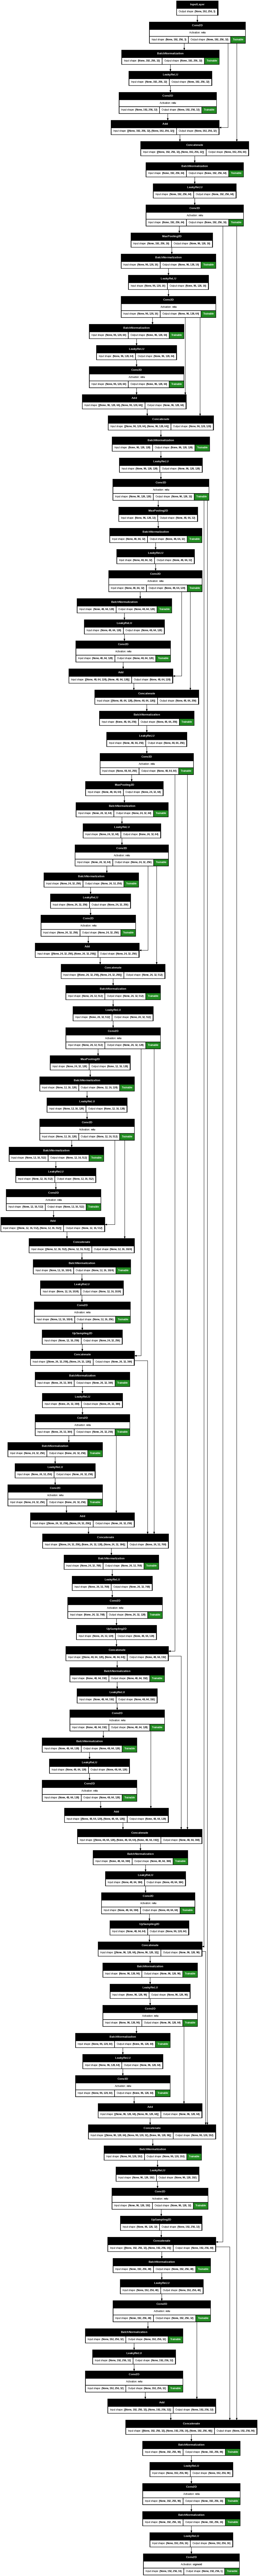

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Concatenate, LeakyReLU, BatchNormalization, MaxPool2D, ReLU, Activation, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D, Add
from tensorflow.keras.initializers import RandomNormal, HeNormal, VarianceScaling, HeUniform, GlorotUniform
import numpy as np

def downscale_block(input_tensor, filters, kernel_size=(3, 3), padding="same", strides=1, max_pool=False):

    if not max_pool:
        conv0 = Conv2D(
            filters=filters,
            kernel_size=np.array(kernel_size) * 2 + 1,
            strides=strides,
            padding=padding,
            activation='relu',
            kernel_initializer=HeUniform(seed=42),
            kernel_regularizer = tf.keras.regularizers.L2(0.1),

            )
        conv1 = Conv2D(
            filters=filters,
            kernel_size=np.array(kernel_size) * 2 + 1,
            strides=strides,
            padding=padding,
            activation='relu',
            kernel_initializer=HeUniform(seed=42),
            kernel_regularizer = tf.keras.regularizers.L2(0.1),

            )
        pool = MaxPool2D((2, 2), strides=(2, 2), padding='same')
    else:
        pool = MaxPool2D((2, 2), strides=(2, 2), padding='same')

    convA = Conv2D(
        filters= filters,
        kernel_size=np.array(kernel_size) // 2,
        strides=strides,
        padding=padding,
        activation='relu',
        kernel_initializer=HeUniform(seed=42),
        kernel_regularizer = tf.keras.regularizers.L2(0.1),
                )

    convB = Conv2D(
        filters,
        np.array(kernel_size),
        strides,
        padding,
        activation='relu',
        kernel_initializer=HeUniform(seed=42),
        kernel_regularizer = tf.keras.regularizers.L2(0.1),
                )

    convC = Conv2D(
        filters // 2,
        np.array(kernel_size),
        strides,
        padding,
        activation='relu',
        kernel_initializer=HeUniform(seed=42),
        kernel_regularizer = tf.keras.regularizers.L2(0.1),
                )

    reluA = LeakyReLU(negative_slope=0.3)
    reluB = LeakyReLU(negative_slope=0.3)
    reluC = LeakyReLU(negative_slope=0.3)
    bn2a = BatchNormalization(momentum=0.01, epsilon=1e-04)
    bn2b = BatchNormalization(momentum=0.01, epsilon=1e-04)
    bn2c = BatchNormalization(momentum=0.01, epsilon=1e-04)

    if not max_pool:
        d = conv0(input_tensor)
        x = bn2a(d)
        x = reluA(x)

        x = conv1(x)

        x = Add()([x, d])
        skip = Concatenate(axis=-1)([x, d])

        skip = bn2c(skip)
        skip = reluC(skip)
        skip = convC(skip)

        p = pool(skip)

        return skip, p
    else:
        d = bn2a(input_tensor)
        d = reluA(d)
        d_top = convA(d)

        x = bn2b(d_top)
        x = reluB(x)
        x = convB(x)

        x = Add()([x, d_top])
        skip = Concatenate(axis=-1)([x, d_top])

        skip = bn2c(skip)
        skip = reluC(skip)
        skip = convC(skip)

        p = pool(skip)

        return skip, p

def upscale_block(input_tensor, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = UpSampling2D((2, 2))

    convA = Conv2D(
        filters,
        np.array(kernel_size) // 2,
        strides,
        padding,
        activation='relu',
        kernel_initializer=HeUniform(seed=42),
        kernel_regularizer = tf.keras.regularizers.L2(0.1),
                )

    convB = Conv2D(
        filters,
        np.array(kernel_size),
        strides,
        padding,
        activation='relu',
        kernel_initializer=HeUniform(seed=42),
        kernel_regularizer = tf.keras.regularizers.L2(0.1),
                )

    convC = Conv2D(
        filters // 2,
        np.array(kernel_size),
        strides,
        padding,
        activation='relu',
        kernel_initializer=HeUniform(seed=42),
        kernel_regularizer = tf.keras.regularizers.L2(0.1),
                )

    reluA = LeakyReLU(negative_slope=0.3)
    reluB = LeakyReLU(negative_slope=0.3)
    reluC = LeakyReLU(negative_slope=0.3)
    bn2a = BatchNormalization(momentum=0.01, epsilon=1e-04)
    bn2b = BatchNormalization(momentum=0.01, epsilon=1e-04)
    bn2c = BatchNormalization(momentum=0.01, epsilon=1e-04)
    conc = Concatenate(axis=-1)
    cond = Concatenate(axis=-1)

    x = us(input_tensor)
    concat = conc([x, skip])

    x = bn2a(concat)
    x = reluA(x)
    d = convA(x)

    x = bn2b(d)
    x = reluB(x)
    x = convB(x)
    x += d
    x = cond([x, skip, concat])

    x = bn2c(x)
    x = reluC(x)
    x = convC(x)

    return x

def depth_estimation_model(input_tensor):

    """Mô hình ước tính độ sau"""

    bn_out = BatchNormalization(momentum=0.01, epsilon=1e-04)
    relu_out = LeakyReLU(negative_slope=0.1)

    filters = 32

    f = [filters, filters*2, filters*4, filters*8, filters*16, filters*32]
    # f = [64, 128, 256, 512, 1024]

    c1, p1 = downscale_block(input_tensor, f[0], max_pool=False)

    c2, p2 = downscale_block(p1, f[1], max_pool=True)

    c3, p3 = downscale_block(p2, f[2], max_pool=True)

    c4, p4 = downscale_block(p3, f[3], max_pool=True)

    middle, _ = downscale_block(p4, f[4], max_pool=True)

    u2 = upscale_block(middle, c4, f[3])
    u3 = upscale_block(u2, c3, f[2])
    u4 = upscale_block(u3, c2, f[1])
    u5 = upscale_block(u4, c1, f[0])

    output_tensor = bn_out(u5)
    output_tensor = relu_out(output_tensor)

    output_tensor = Conv2D(1,
                           (1, 1)
                           , padding="same"
                           , activation="sigmoid"
                           , kernel_initializer=HeUniform(seed=42)
                           , kernel_regularizer=tf.keras.regularizers.L2(0.1) )(output_tensor)
    return output_tensor

input_tensor = tf.keras.layers.Input(shape=(192, 256, 3))
output_tensor = depth_estimation_model(input_tensor)
model = tf.keras.models.Model(inputs=input_tensor, outputs=output_tensor, name='DE')

print(model.count_params())
print(len(model.layers))

tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=True,
    dpi=60,
    show_layer_activations=True,
    show_trainable=True)

In [ ]:
model.summary()

# VISUALIZATION MODEL SHAPE

/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


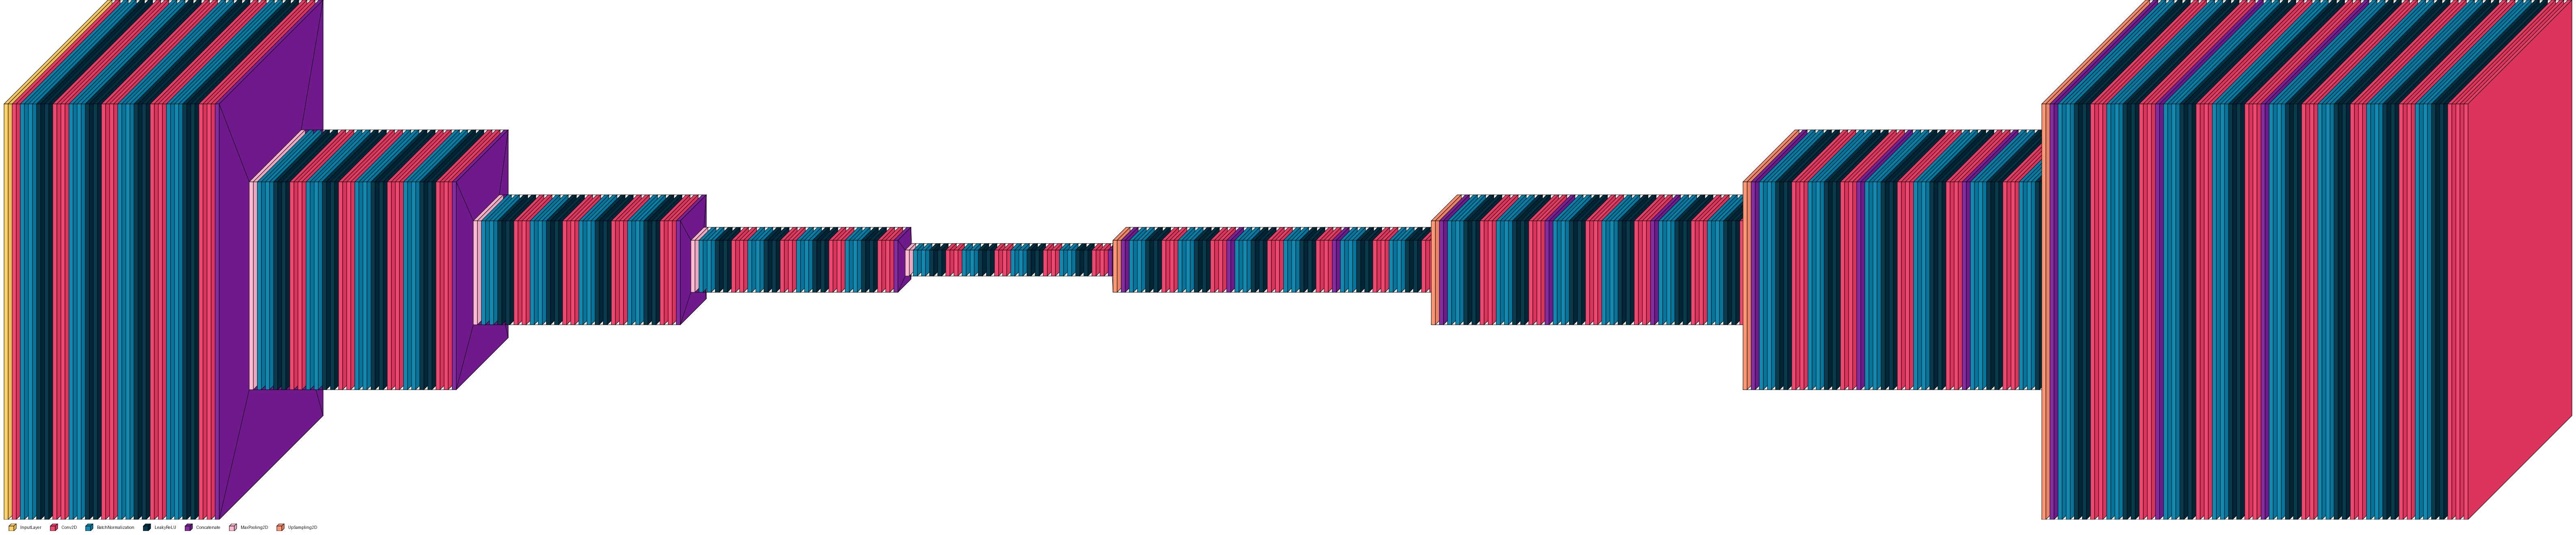

In [163]:
# !pip install visualkeras

import visualkeras
visualkeras.layered_view(model, legend=True, max_z=10)



# TRAIN CUSTOM

In [165]:
np.max(y_train), np.min(y_train)

(np.float32(1.0), np.float32(0.0))

In [151]:
import tensorflow as tf

# Giả sử y_true và y_pred có shape (batch_size, height, width, 1)
# và giá trị pixel nằm trong khoảng [0, 1]
def ssim_loss(y_true, y_pred):
  # max_val là giá trị pixel tối đa, thường là 1.0 nếu ảnh đã được chuẩn hóa
  ssim_val = tf.image.ssim(y_true, y_pred, max_val=1.0)
  # SSIM càng cao (gần 1) thì loss càng thấp (gần 0)
  return 1.0 - tf.reduce_mean(ssim_val)

# Sau đó bạn có thể gán:
# loss_fn = ssim_loss
# Hoặc định nghĩa combined_loss nếu muốn kết hợp nhiều loss:
def combined_loss(y_true, y_pred):
    loss1 = ssim_loss(y_true, y_pred)
    loss2 = tf.reduce_mean(tf.square(y_true - y_pred))
    alpha = 0.8 # Trọng số cho SSIM loss
    return alpha * loss1 + (1 - alpha) * loss2

loss_fn = combined_loss # Gán hàm combined_loss cho loss_fn để sử dụng trong các step

# =====================================================================================================
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# =====================================================================================================
THRESSHOD = 0.02
THRESSHOD_VAL = 0.02

def ssim_loss(y_true, y_pred):
  ssim_val = tf.image.ssim(y_true, y_pred, max_val=1.0)
  return 1.0 - tf.reduce_mean(ssim_val)

# Mean Absolute Error (MAE)
@tf.function
def calculate_mae(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

# Ví dụ: Định nghĩa Mean Square Error (MSE)
@tf.function
def calculate_mse(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# Ví dụ: Định nghĩa Root Mean Squared Error (RMSE)
@tf.function
def calculate_rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

def combined_loss(y_true, y_pred):
    loss1 = ssim_loss(y_true, y_pred)
    loss2 = tf.reduce_mean(tf.square(y_true - y_pred))
    alpha = 0.8 # Trọng số cho SSIM loss
    return alpha * loss1 + (1 - alpha) * loss2

@tf.function
def train_step_tf(model, X, y, loss_fn, optimizer):
    with tf.GradientTape() as tape:
        y_pred = model(X, training=True)
        loss = loss_fn(y, y_pred) # Sử dụng loss_fn đã định nghĩa

    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # dynamic threshold per batch
    max_truth = tf.reduce_max(y)
    threshold = THRESSHOD * max_truth
    acc = tf.reduce_mean(tf.cast(tf.abs(y - y_pred) < threshold, tf.float32))
    mae = calculate_mae(y, y_pred) # Tính MAE
    rmse = calculate_rmse(y, y_pred) # Tính RMSE
    mse = calculate_mse(y, y_pred) # Tính RMSE
    return loss, acc, mae, rmse, mse # Trả về các metrics mới

@tf.function
def validate_step_tf(model, X, y, loss_fn):
    y_pred = model(X, training=False)
    loss = loss_fn(y, y_pred) # Sử dụng loss_fn đã định nghĩa

    max_truth = tf.reduce_max(y)
    threshold = THRESSHOD_VAL * max_truth
    acc = tf.reduce_mean(tf.cast(tf.abs(y - y_pred) < threshold, tf.float32))
    mae = calculate_mae(y, y_pred) # Tính MAE
    rmse = calculate_rmse(y, y_pred) # Tính RMSE
    mse = calculate_mse(y, y_pred)
    return loss, acc, mae, rmse, mse # Trả về các metrics mới

import matplotlib.pyplot as plt
from datetime import datetime

def plot_training_history(history):

    # Xác định số epoch dựa trên độ dài của một trong các list metrics
    epochs = range(1, len(history['train_loss']) + 1)

    # Tạo một figure với lưới 2x2 subplot
    plt.figure(figsize=(25, 5)) # Tăng kích thước để vừa 4 đồ thị

    # --- Đồ thị Loss ---
    plt.subplot(151)
    plt.plot(epochs, history['train_loss'], label='Mất mát (Train)', linestyle='-', marker='o', markersize=4)
    plt.plot(epochs, history['val_loss'], label='Mất mát (Validation)', linestyle='-', marker='x', markersize=4)
    plt.title('Hàm mất mát (Loss)')
    plt.xlabel('Epoch')
    plt.ylabel('Mất mát')
    plt.legend()
    plt.grid(True)

    # --- Đồ thị Accuracy ---
    plt.subplot(152)
    plt.plot(epochs, history['train_acc'], label='Độ chính xác (Train)', linestyle='-', marker='o', markersize=4)
    plt.plot(epochs, history['val_acc'], label='Độ chính xác (Validation)', linestyle='-', marker='x', markersize=4)
    plt.title('Độ chính xác (Accuracy)')
    plt.xlabel('Epoch')
    plt.ylabel('Độ chính xác')
    plt.legend()
    plt.grid(True)

    # --- Đồ thị MAE ---
    plt.subplot(153)
    plt.plot(epochs, history['train_mae'], label='MAE (Train)', linestyle='-', marker='o', markersize=4)
    plt.plot(epochs, history['val_mae'], label='MAE (Validation)', linestyle='-', marker='x', markersize=4)
    plt.title('Sai số tuyệt đối trung bình (MAE)')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)

    # --- Đồ thị RMSE ---
    plt.subplot(154)
    plt.plot(epochs, history['train_rmse'], label='RMSE (Train)', linestyle='-', marker='o', markersize=4)
    plt.plot(epochs, history['val_rmse'], label='RMSE (Validation)', linestyle='-', marker='x', markersize=4)
    plt.title('Sai số toàn phương trung bình căn (RMSE)')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid(True)

    # --- Đồ thị MSE ---
    plt.subplot(155)
    plt.plot(epochs, history['train_mse'], label='MSE (Train)', linestyle='-', marker='o', markersize=4)
    plt.plot(epochs, history['val_mse'], label='MSE (Validation)', linestyle='-', marker='x', markersize=4)
    plt.title('Sai số binh phương trung bình (MSE)')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

    # Tự động điều chỉnh khoảng cách giữa các subplot
    plt.tight_layout()
    # Hiển thị đồ thị
    plt.show()

def train_depth_estimation_model(model,
                                 train_dataset,
                                 val_dataset,
                                 loss_fn,
                                 optimizer,
                                 epochs,
                                 patience,
                                 size_img):

    history = {
        "train_loss": [], "train_acc": [], "train_mae": [], "train_rmse": [], "train_mse": [],
        "val_loss": [], "val_acc": [], "val_mae": [], "val_rmse": [], "val_mse": []
    }

    # Lưu tốc độ học ban đầu để hiển thị hoặc tham khảo
    initial_learning_rate = optimizer.learning_rate.numpy()
    print(f"Initial Learning Rate: {initial_learning_rate:.5f}")

    path_save_wights = f'/content/drive/MyDrive/KLTN_LeQuangVinh_19503031/FINAL_CODE_COLAB/D-ANY/checkpoint_paper/V2_RES_DEN_UNET_{size_img[0]}_{size_img[1]}.weights.h5'
    best_val_loss = float('inf') # Hoặc có thể dùng best_val_loss = float('inf')
    epochs_without_improvement = 0

    for epoch in range(epochs):

        start_time = datetime.now()
        print(f"Epoch {epoch+1}/{epochs} ({len(train_dataset)}/{len(val_dataset)}) | ", end='')

        train_loss, train_acc, train_mae, train_rmse, train_mse = 0.0, 0.0, 0.0, 0.0, 0.0 # Khởi tạo
        steps = 0
        for X, y in train_dataset:
            # Nhận thêm metrics từ train_step_tf
            loss, acc, mae, rmse, mse = train_step_tf(model, X, y, loss_fn, optimizer)
            train_loss += loss.numpy()
            train_acc += acc.numpy()
            train_mae += mae.numpy() # Tích lũy
            train_rmse += rmse.numpy() # Tích lũy
            train_mse += mse.numpy() # Tích lũy
            steps += 1

        train_loss /= steps
        train_acc /= steps
        train_mae /= steps # Tính trung bình
        train_rmse /= steps # Tính trung bình
        train_mse /= steps # Tính trung bình

        val_loss, val_acc, val_mae, val_rmse, val_mse = 0.0, 0.0, 0.0, 0.0, 0.0 # Khởi tạo
        steps_val = 0
        for X, y in val_dataset:
            # Nhận thêm metrics từ validate_step_tf
            loss_val, acc_val, mae_val, rmse_val, mse_val = validate_step_tf(model, X, y, loss_fn)
            val_loss += loss_val.numpy()
            val_acc += acc_val.numpy()
            val_mae += mae_val.numpy() # Tích lũy
            val_rmse += rmse_val.numpy() # Tích lũy
            val_mse += mse_val.numpy() # Tích lũy
            steps_val += 1
        val_loss /= steps_val
        val_acc /= steps_val
        val_mae /= steps_val # Tính trung bình
        val_rmse /= steps_val # Tính trung bình
        val_mse /= steps_val # Tính trung bình

        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)
        history["train_mae"].append(train_mae) # Lưu vào history
        history["train_rmse"].append(train_rmse) # Lưu vào history
        history["train_mse"].append(train_mse) # Lưu vào history
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc)
        history["val_mae"].append(val_mae) # Lưu vào history
        history["val_rmse"].append(val_rmse) # Lưu vào history
        history["val_mse"].append(val_mse) # Lưu vào history

        end_time = datetime.now()
        print_msg = (
            f"Time (s): {(end_time - start_time).seconds}, "
            f"Train Loss: {train_loss:.5f}, Train Acc: {train_acc:.5f}, Train MAE: {train_mae:.5f}, Train RMSE: {train_rmse:.5f}, Train MSE: {train_mse:.5f}, "
            f"Val Loss: {val_loss:.5f}, Val Acc: {val_acc:.5f}, Val MAE: {val_mae:.5f}, Val RMSE: {val_rmse:.5f}, Val MSE: {val_mse:.5f}")

        print(print_msg) # In thông tin đầy đủ

        if val_loss < best_val_loss: # Hoặc if val_loss <= best_val_loss:
            print(f"  Improved {val_loss - best_val_loss :.5f} val_loss from {best_val_loss:.5f} to {val_loss:.5f}. Check points save !")
            best_val_loss = val_loss
            model.save_weights(path_save_wights)
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        if (epoch + 1) % (epochs // 10) == 0:
            # Có thể cập nhật plot_training_history để vẽ thêm MAE, RMSE nếu muốn
            plot_training_history(history)

        if epoch == 50:
            current_learning_rate = optimizer.learning_rate.numpy()
            new_learning_rate = current_learning_rate * 0.1
            optimizer.learning_rate.assign(new_learning_rate) # Cập nhật tốc độ học của optimizer
            print(f"\nEpoch {epoch+1}: Learning rate from {current_learning_rate:.7f} to {new_learning_rate:.7f}")

        if epochs_without_improvement >= patience:
            print(f"\nEarly stopping.")
            break

    model.load_weights(path_save_wights)
    return history

## Slices Data

In [166]:
import numpy as np
from sklearn.model_selection import train_test_split
from datetime import datetime

batch_size = 4

train_images = X_train.astype(np.float32)
train_depth_maps = y_train.astype(np.float32)
val_images = X_val.astype(np.float32)
val_depth_maps = y_val.astype(np.float32)

X_train, y_train, X_val, y_val = None,None,None,None

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_depth_maps))
train_dataset = train_dataset.cache().shuffle(buffer_size=1024).batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_depth_maps))
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_images, train_depth_maps = None, None
val_images, val_depth_maps = None, None

print('done')

done


In [ ]:
train_dataset.filter, val_dataset


(<bound method DatasetV2.filter of <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 240, 320, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 240, 320, 1), dtype=tf.float32, name=None))>>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 240, 320, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 240, 320, 1), dtype=tf.float32, name=None))>)

## Training

## resnet densenet unet (me)

Start Time: 2025-07-01 00:01:12.680363
loss THRESSHOD = 0.02
5400305
So luong class: 166
Initial Learning Rate: 0.01000
Epoch 1/100 (1315/74) | Time (s): 309, Train Loss: 0.14194, Train Acc: 0.11619, Train MAE: 0.10842, Train RMSE: 0.14863, Train MSE: 0.02387, Val Loss: 0.13385, Val Acc: 0.11905, Val MAE: 0.09879, Val RMSE: 0.13082, Val MSE: 0.01779
  Improved -inf val_loss from inf to 0.13385. Check points save !
Epoch 2/100 (1315/74) | Time (s): 282, Train Loss: 0.11907, Train Acc: 0.15298, Train MAE: 0.08890, Train RMSE: 0.12399, Train MSE: 0.01648, Val Loss: 0.14087, Val Acc: 0.11952, Val MAE: 0.10739, Val RMSE: 0.13953, Val MSE: 0.02021
Epoch 3/100 (1315/74) | Time (s): 282, Train Loss: 0.10106, Train Acc: 0.19548, Train MAE: 0.07367, Train RMSE: 0.10537, Train MSE: 0.01200, Val Loss: 0.09086, Val Acc: 0.24496, Val MAE: 0.05939, Val RMSE: 0.09050, Val MSE: 0.00886
  Improved -0.04299 val_loss from 0.13385 to 0.09086. Check points save !
Epoch 4/100 (1315/74) | Time (s): 282, Train

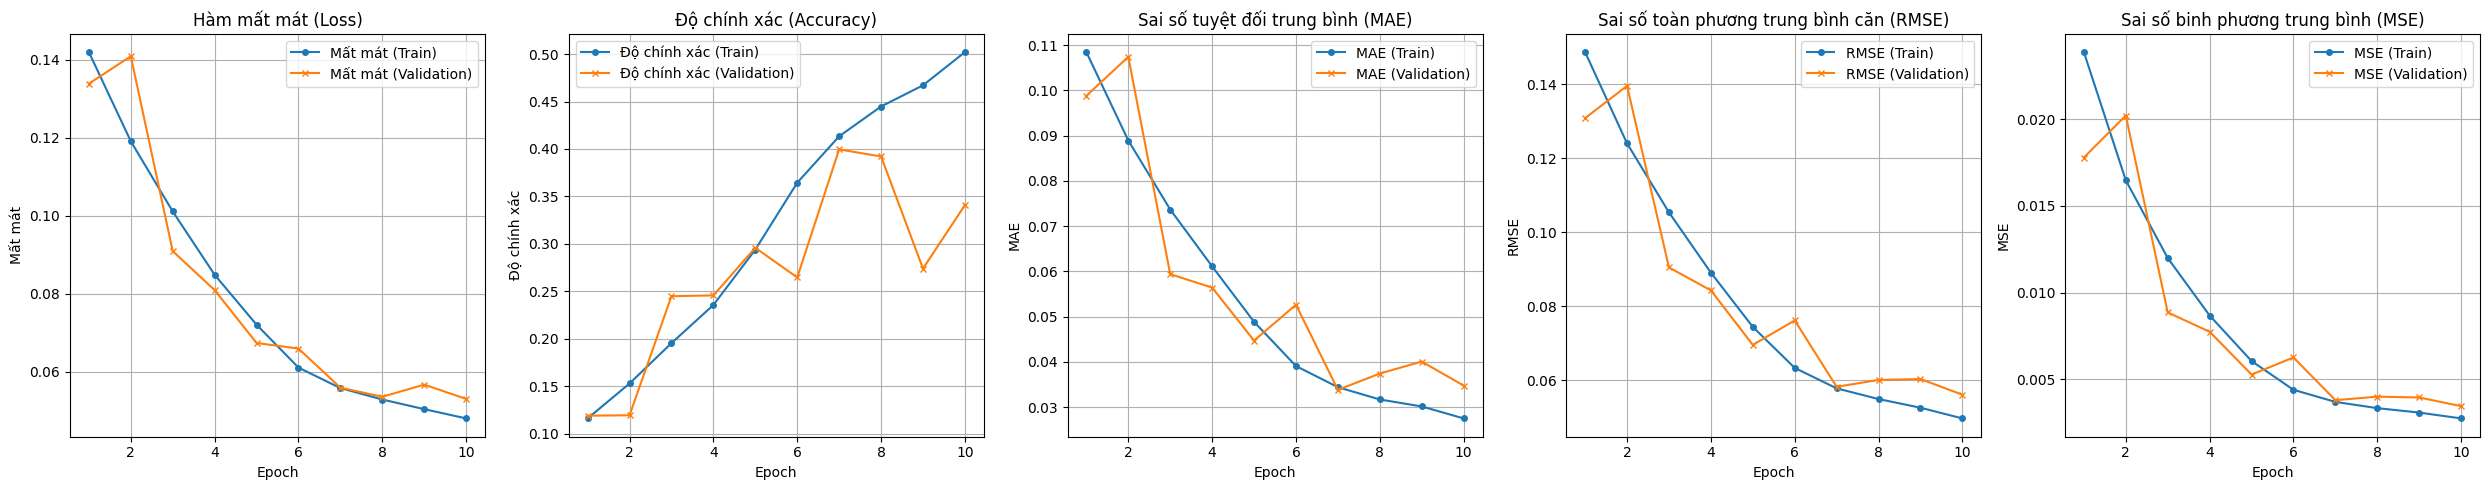

Epoch 11/100 (1315/74) | Time (s): 282, Train Loss: 0.04683, Train Acc: 0.49995, Train MAE: 0.02739, Train RMSE: 0.04904, Train MSE: 0.00268, Val Loss: 0.05419, Val Acc: 0.34754, Val MAE: 0.04027, Val RMSE: 0.06389, Val MSE: 0.00440
Epoch 12/100 (1315/74) | Time (s): 282, Train Loss: 0.04382, Train Acc: 0.50284, Train MAE: 0.02666, Train RMSE: 0.04804, Train MSE: 0.00254, Val Loss: 0.04300, Val Acc: 0.40968, Val MAE: 0.02958, Val RMSE: 0.04943, Val MSE: 0.00268
  Improved -0.00997 val_loss from 0.05296 to 0.04300. Check points save !
Epoch 13/100 (1315/74) | Time (s): 282, Train Loss: 0.03944, Train Acc: 0.53517, Train MAE: 0.02437, Train RMSE: 0.04461, Train MSE: 0.00222, Val Loss: 0.03932, Val Acc: 0.42284, Val MAE: 0.02856, Val RMSE: 0.04787, Val MSE: 0.00253
  Improved -0.00368 val_loss from 0.04300 to 0.03932. Check points save !
Epoch 14/100 (1315/74) | Time (s): 282, Train Loss: 0.03716, Train Acc: 0.56400, Train MAE: 0.02264, Train RMSE: 0.04234, Train MSE: 0.00200, Val Loss: 0

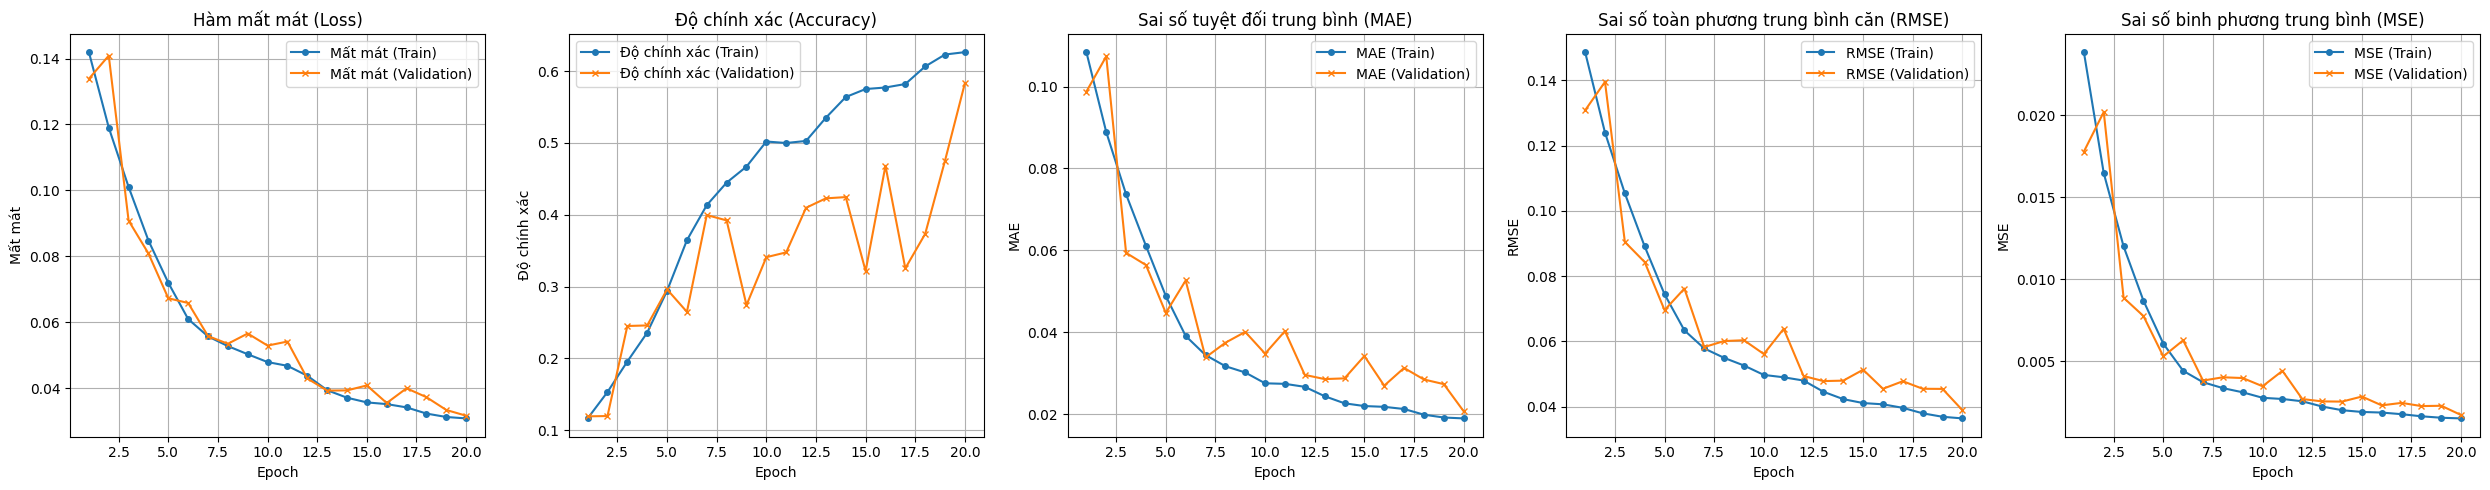

Epoch 21/100 (1315/74) | Time (s): 282, Train Loss: 0.03085, Train Acc: 0.62121, Train MAE: 0.01910, Train RMSE: 0.03657, Train MSE: 0.00151, Val Loss: 0.03336, Val Acc: 0.50594, Val MAE: 0.02315, Val RMSE: 0.04105, Val MSE: 0.00187
Epoch 22/100 (1315/74) | Time (s): 282, Train Loss: 0.02971, Train Acc: 0.65127, Train MAE: 0.01793, Train RMSE: 0.03521, Train MSE: 0.00140, Val Loss: 0.03215, Val Acc: 0.50792, Val MAE: 0.02577, Val RMSE: 0.04406, Val MSE: 0.00214
Epoch 23/100 (1315/74) | Time (s): 282, Train Loss: 0.02907, Train Acc: 0.65617, Train MAE: 0.01764, Train RMSE: 0.03461, Train MSE: 0.00136, Val Loss: 0.03063, Val Acc: 0.58504, Val MAE: 0.02129, Val RMSE: 0.03957, Val MSE: 0.00176
  Improved -0.00106 val_loss from 0.03170 to 0.03063. Check points save !
Epoch 24/100 (1315/74) | Time (s): 282, Train Loss: 0.02949, Train Acc: 0.64007, Train MAE: 0.01822, Train RMSE: 0.03496, Train MSE: 0.00138, Val Loss: 0.03958, Val Acc: 0.33499, Val MAE: 0.03858, Val RMSE: 0.05676, Val MSE: 0.

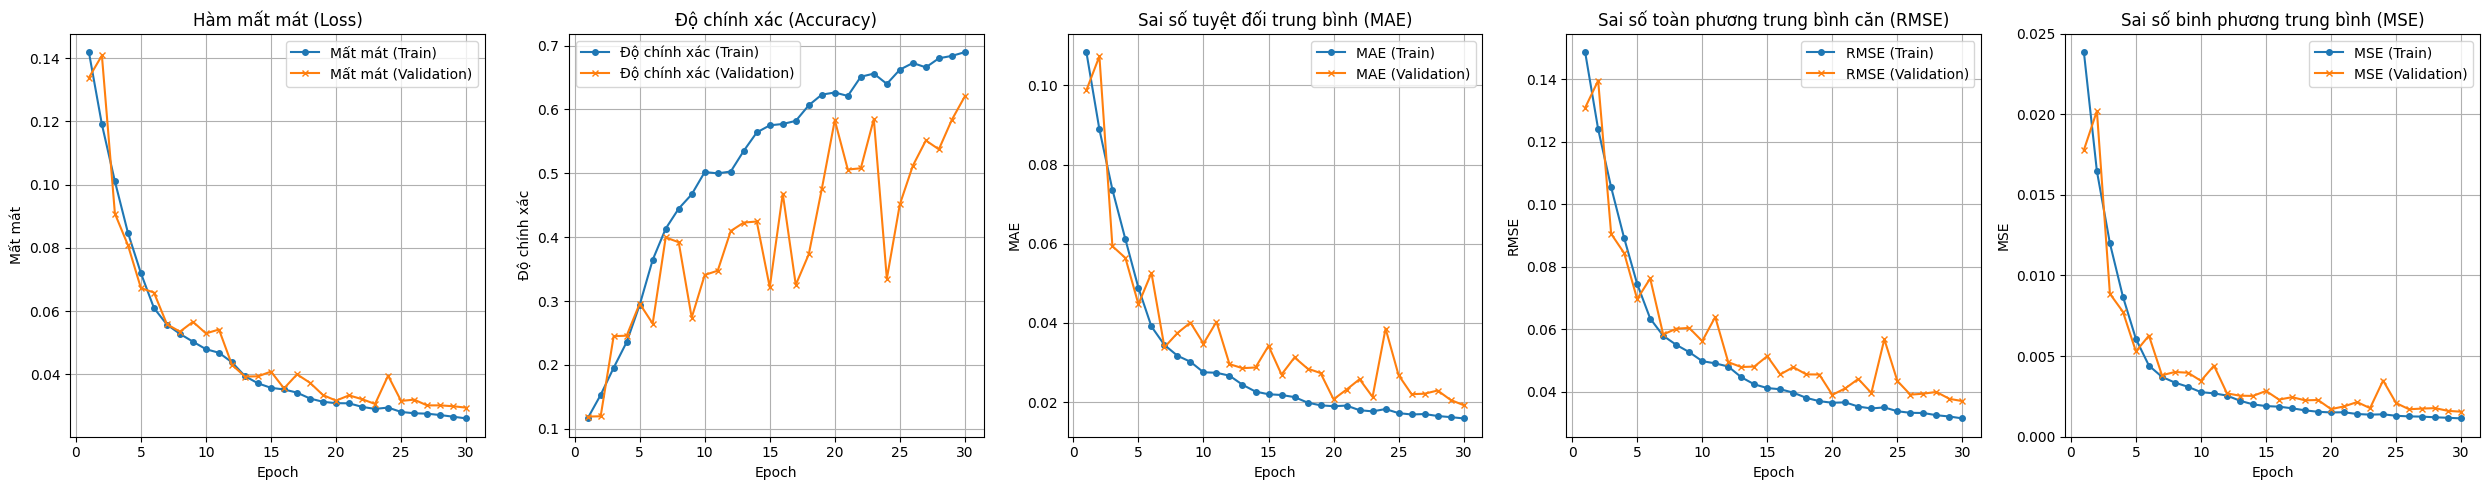

Epoch 31/100 (1315/74) | Time (s): 282, Train Loss: 0.02621, Train Acc: 0.67934, Train MAE: 0.01631, Train RMSE: 0.03189, Train MSE: 0.00115, Val Loss: 0.03037, Val Acc: 0.57637, Val MAE: 0.02133, Val RMSE: 0.03924, Val MSE: 0.00171
Epoch 32/100 (1315/74) | Time (s): 282, Train Loss: 0.02527, Train Acc: 0.69279, Train MAE: 0.01572, Train RMSE: 0.03101, Train MSE: 0.00109, Val Loss: 0.03308, Val Acc: 0.47378, Val MAE: 0.02713, Val RMSE: 0.04505, Val MSE: 0.00223
Epoch 33/100 (1315/74) | Time (s): 282, Train Loss: 0.02500, Train Acc: 0.69854, Train MAE: 0.01548, Train RMSE: 0.03075, Train MSE: 0.00106, Val Loss: 0.03058, Val Acc: 0.54152, Val MAE: 0.02202, Val RMSE: 0.03902, Val MSE: 0.00170
Epoch 34/100 (1315/74) | Time (s): 282, Train Loss: 0.02456, Train Acc: 0.69226, Train MAE: 0.01550, Train RMSE: 0.03046, Train MSE: 0.00105, Val Loss: 0.03004, Val Acc: 0.54632, Val MAE: 0.02325, Val RMSE: 0.04107, Val MSE: 0.00188
Epoch 35/100 (1315/74) | Time (s): 282, Train Loss: 0.02435, Train A

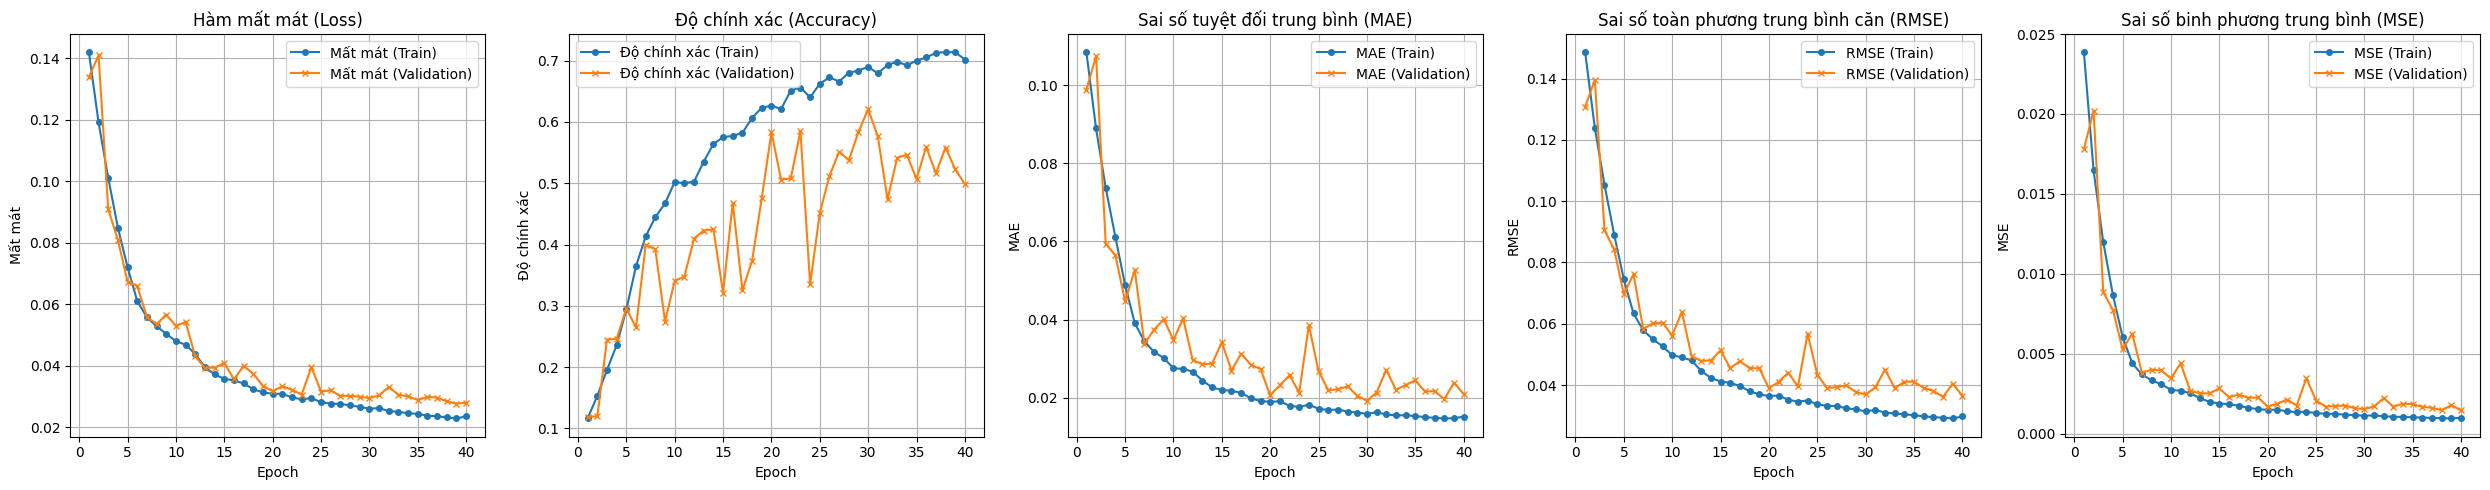

Epoch 41/100 (1315/74) | Time (s): 282, Train Loss: 0.02235, Train Acc: 0.71868, Train MAE: 0.01439, Train RMSE: 0.02862, Train MSE: 0.00093, Val Loss: 0.03156, Val Acc: 0.49175, Val MAE: 0.02696, Val RMSE: 0.04505, Val MSE: 0.00223
Epoch 42/100 (1315/74) | Time (s): 282, Train Loss: 0.02203, Train Acc: 0.72063, Train MAE: 0.01437, Train RMSE: 0.02838, Train MSE: 0.00092, Val Loss: 0.03225, Val Acc: 0.35103, Val MAE: 0.02691, Val RMSE: 0.04182, Val MSE: 0.00186
Epoch 43/100 (1315/74) | Time (s): 282, Train Loss: 0.02279, Train Acc: 0.70337, Train MAE: 0.01502, Train RMSE: 0.02920, Train MSE: 0.00097, Val Loss: 0.02773, Val Acc: 0.49738, Val MAE: 0.02142, Val RMSE: 0.03705, Val MSE: 0.00152
Epoch 44/100 (1315/74) | Time (s): 282, Train Loss: 0.02177, Train Acc: 0.72819, Train MAE: 0.01414, Train RMSE: 0.02806, Train MSE: 0.00089, Val Loss: 0.02958, Val Acc: 0.41976, Val MAE: 0.02380, Val RMSE: 0.03856, Val MSE: 0.00161
Epoch 45/100 (1315/74) | Time (s): 282, Train Loss: 0.02136, Train A

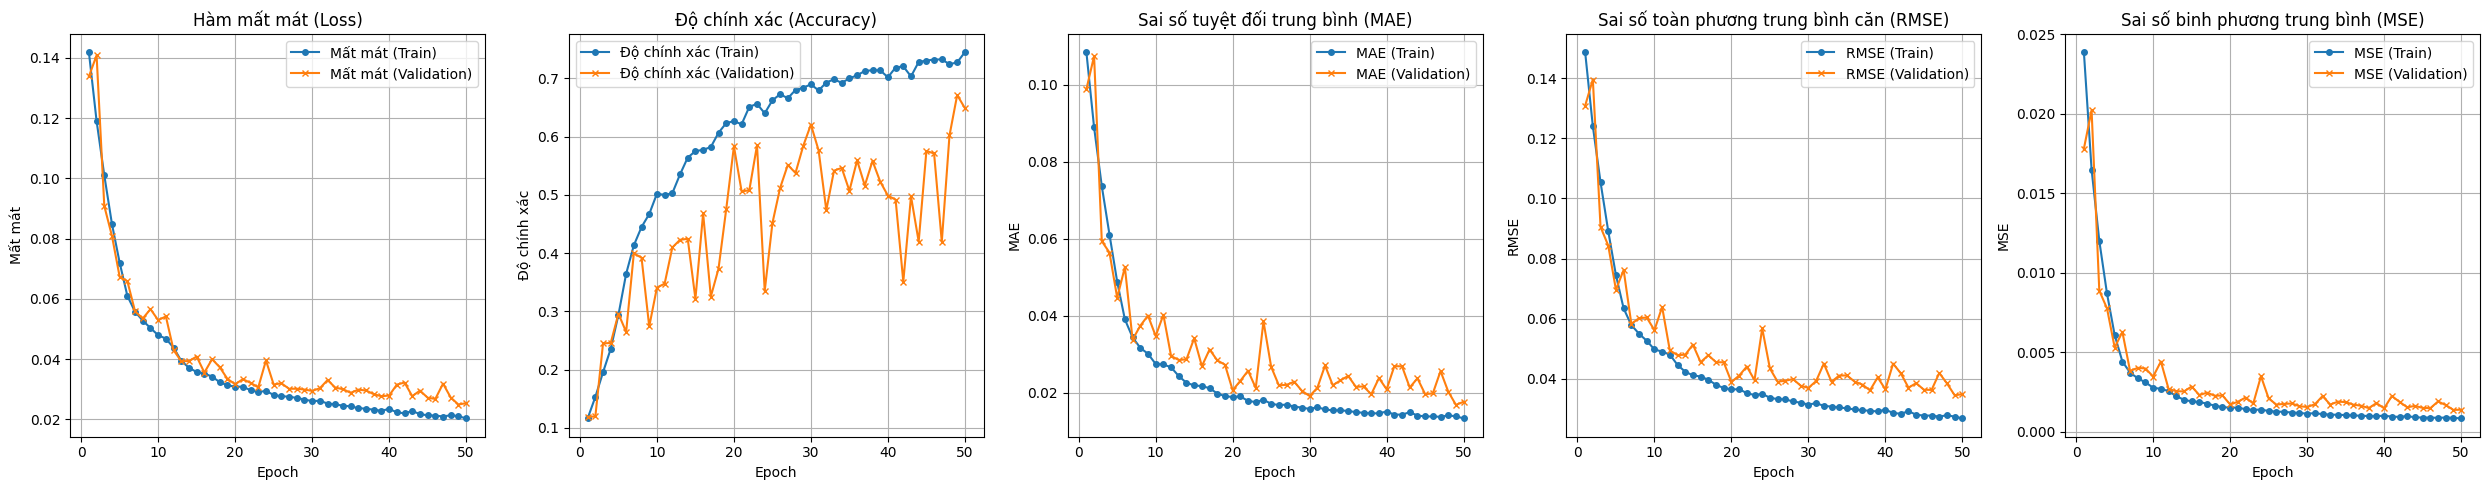

Epoch 51/100 (1315/74) | Time (s): 282, Train Loss: 0.02068, Train Acc: 0.72852, Train MAE: 0.01388, Train RMSE: 0.02722, Train MSE: 0.00084, Val Loss: 0.02695, Val Acc: 0.55780, Val MAE: 0.01929, Val RMSE: 0.03523, Val MSE: 0.00138

Epoch 51: Learning rate from 0.0100000 to 0.0010000
Epoch 52/100 (1315/74) | Time (s): 282, Train Loss: 0.01815, Train Acc: 0.80567, Train MAE: 0.01130, Train RMSE: 0.02432, Train MSE: 0.00068, Val Loss: 0.02444, Val Acc: 0.62334, Val MAE: 0.01868, Val RMSE: 0.03517, Val MSE: 0.00139
  Improved -0.00051 val_loss from 0.02495 to 0.02444. Check points save !
Epoch 53/100 (1315/74) | Time (s): 282, Train Loss: 0.01725, Train Acc: 0.82683, Train MAE: 0.01061, Train RMSE: 0.02329, Train MSE: 0.00063, Val Loss: 0.02406, Val Acc: 0.63120, Val MAE: 0.01824, Val RMSE: 0.03454, Val MSE: 0.00135
  Improved -0.00038 val_loss from 0.02444 to 0.02406. Check points save !
Epoch 54/100 (1315/74) | Time (s): 282, Train Loss: 0.01690, Train Acc: 0.83195, Train MAE: 0.01040,

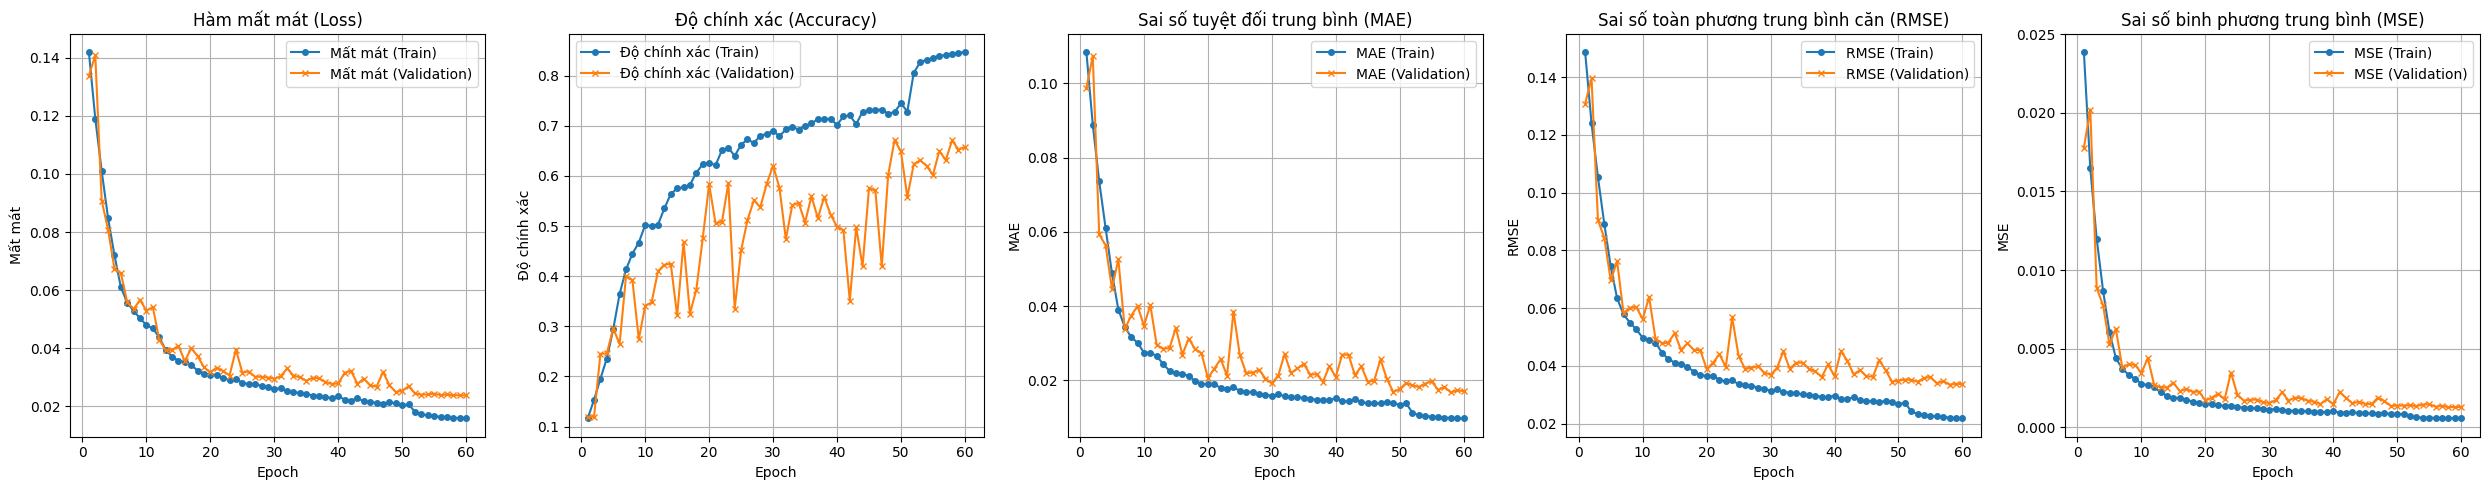

Epoch 61/100 (1315/74) | Time (s): 282, Train Loss: 0.01576, Train Acc: 0.85082, Train MAE: 0.00974, Train RMSE: 0.02176, Train MSE: 0.00056, Val Loss: 0.02370, Val Acc: 0.65878, Val MAE: 0.01712, Val RMSE: 0.03365, Val MSE: 0.00128
  Improved -0.00005 val_loss from 0.02376 to 0.02370. Check points save !
Epoch 62/100 (1315/74) | Time (s): 282, Train Loss: 0.01563, Train Acc: 0.85251, Train MAE: 0.00965, Train RMSE: 0.02165, Train MSE: 0.00055, Val Loss: 0.02349, Val Acc: 0.66709, Val MAE: 0.01678, Val RMSE: 0.03335, Val MSE: 0.00126
  Improved -0.00022 val_loss from 0.02370 to 0.02349. Check points save !
Epoch 63/100 (1315/74) | Time (s): 282, Train Loss: 0.01557, Train Acc: 0.85521, Train MAE: 0.00959, Train RMSE: 0.02149, Train MSE: 0.00055, Val Loss: 0.02405, Val Acc: 0.65440, Val MAE: 0.01707, Val RMSE: 0.03353, Val MSE: 0.00128
Epoch 64/100 (1315/74) | Time (s): 282, Train Loss: 0.01551, Train Acc: 0.85444, Train MAE: 0.00957, Train RMSE: 0.02145, Train MSE: 0.00054, Val Loss: 0

In [ ]:
# Get the current time
start_time = datetime.now()
# Print the current time
print("Start Time:", start_time)

# loss_fn = tf.keras.losses.MeanSquaredError()  # Cho bài toán hồi quy MSE
# loss_fn = combined_loss
# loss_fn = tf.keras.losses.Huber(delta=0.5)
# loss_fn = tf.keras.losses.MeanAbsoluteError()

# optimizer = tf.keras.optimizers.SGD(mome)
optimizer = tf.keras.optimizers.Adam(0.01)

# =====================================================================================================
print(f"loss THRESSHOD = {THRESSHOD}")
print(model.count_params())
print(f"So luong class: {len(model.layers)}")

_ = optimizer.build(model.trainable_variables) # optimizer.build() có thể thay đổi tốc độ học trong vòng lặp huấn luyện bằng phương thức. ví dụ: optimizer.learning_rate.assign(new_learning_rate)
# =====================================================================================================

epochs = 100
history10 = train_depth_estimation_model(
        model,
        train_dataset,
        val_dataset,
        combined_loss,
        optimizer,
        epochs,
        patience=100,
        size_img=(192, 256)
    )

# Ví dụ: In ra các khóa lưu trong history sau khi huấn luyện
print("Các metric lưu trong history:", list(history10.keys()))

end_time = datetime.now()
print("Done at:", end_time)
print(f"Time (seconds): {(end_time - start_time).seconds}")

# LOAD WEIGHTS

In [19]:
# model.load_weights('/content/drive/MyDrive/KLTN_LeQuangVinh_19503031/FINAL_CODE_COLAB/D-ANY/checkpoint_paper/Paper2_hamy_nets_192_256.weights.h5') # HSMY
model.load_weights(f'/content/drive/MyDrive/KLTN_LeQuangVinh_19503031/FINAL_CODE_COLAB/D-ANY/checkpoint_paper/V2_RES_DEN_UNET_192_256.weights.h5') # HSMY

In [ ]:
model.load_weights('/content/drive/MyDrive/KLTN_LeQuangVinh_19503031/FINAL_CODE_COLAB/ck_cae/model_CAE_192_256.weights.h5') # CAE

In [ ]:
model.load_weights('/content/drive/MyDrive/KLTN_LeQuangVinh_19503031/FINAL_CODE_COLAB/ck_res/model_U1_192_256.weights.h5') # UNET
# /content/drive/MyDrive/KLTN_LeQuangVinh_19503031/FINAL_CODE/Unet_Resnet_All.csv

# STATIC IMAGE PREDICT

4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step


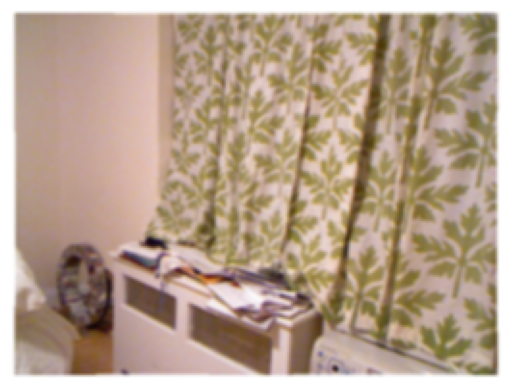

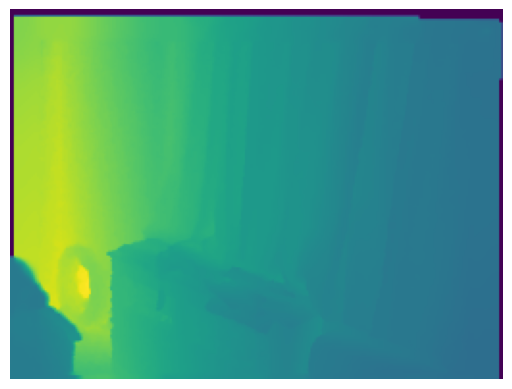

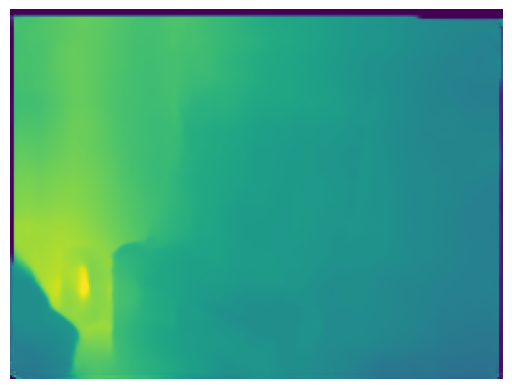

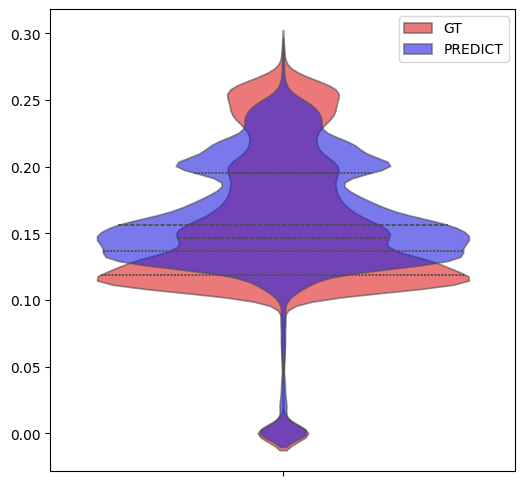

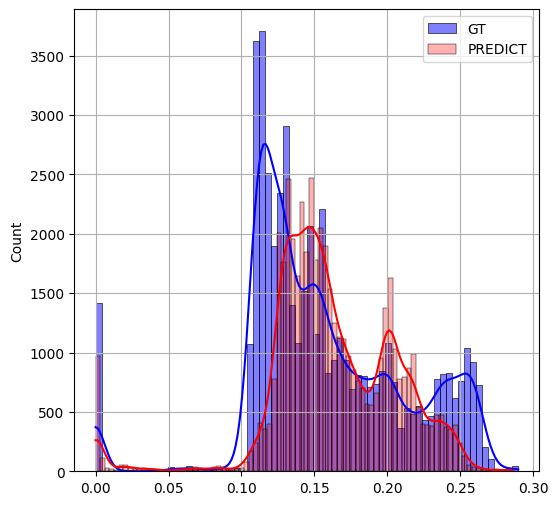

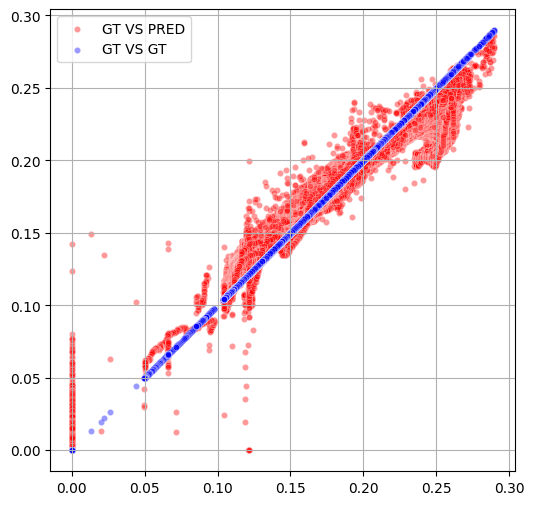

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test) # RESNET UNET
y_pred = np.squeeze(y_pred)

index_img = 3
plt.imshow(X_test[index_img])
plt.axis(False)
plt.show()

plt.imshow(y_test[index_img])
plt.axis(False)
plt.show()

plt.imshow(y_pred[index_img])
plt.axis(False)
plt.show()

plt.figure(figsize=(6,6))
sns.violinplot(y=y_test[index_img].flatten(), inner="quart", label="GT" , color='red', alpha=0.6)
sns.violinplot(y=y_pred[index_img].flatten(), inner="quart", label='PREDICT', color='blue', alpha=0.6)
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
sns.histplot(y_test[index_img].flatten(), kde=True, label="GT", color='blue')
sns.histplot(y_pred[index_img].flatten(), kde=True, label="PREDICT", alpha=0.3, color='red')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test[index_img].flatten(), y=y_pred[index_img].flatten(), s=20, alpha=0.4, label='GT VS PRED', color='red')
sns.scatterplot(x=y_test[index_img].flatten(), y=y_test[index_img].flatten(), s=20, alpha=0.4, label='GT VS GT', color='blue')
plt.legend()
plt.grid(True)
plt.show()

# SAVED HISTORY TRAINED

In [ ]:
import pandas as pd

df = pd.DataFrame(history10)
df.to_csv('/content/drive/MyDrive/KLTN_LeQuangVinh_19503031/FINAL_CODE_COLAB/D-ANY/checkpoint_paper/CSV_V2_RES_DEN_UNET_192_256.csv')

df.tail(10)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# df_unet_1 = pd.read_csv(f'/content/drive/MyDrive/KLTN_LeQuangVinh_19503031/FINAL_CODE_COLAB/D-ANY/checkpoint_paper/CSV_V2_0_ME.csv').drop(columns=['Unnamed: 0'])
df_unet_2 = pd.read_csv('/content/drive/MyDrive/KLTN_LeQuangVinh_19503031/FINAL_CODE_COLAB/D-ANY/checkpoint_paper/CSV_V2_RES_DEN_UNET_192_256.csv').drop(columns=['Unnamed: 0'])
df_unet_3 = pd.read_csv('/content/drive/MyDrive/KLTN_LeQuangVinh_19503031/FINAL_CODE_COLAB/D-ANY/checkpoint_paper/CSV_V1_ME.csv').drop(columns=['Unnamed: 0'])
# df_unet_1.shape, df_unet_2.shape, df_unet_3.shape

In [ ]:
def plot_comparison_training_history(len_unet_1, history_unet_1, len_unet_2, history_unet_2):

    plt.figure(figsize=(12, 6))

    # # Plotting Loss
    # plt.subplot(1, 2, 1)
    # plt.title('Training Accuracy Comparison')
    # plt.xlabel('Epochs')
    # plt.ylabel('Accuracy')
    # plt.legend()
    # plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(range(len_unet_2), history_unet_2['val_acc'].values, label='V1 UNET', linestyle='--', marker='x', markersize=0.1, color="#1000f4")
    plt.plot(range(len_unet_2), history_unet_2['train_acc'].values, label='V1 UNET', linestyle='-', marker='x', markersize=0.1, color="#002df4")
    # plt.plot(range(len_unet_0), history_unet_0['val_acc'].values, label='RESNET UNET (Ours)', linestyle='--', marker='x', markersize=0.1, color="#f40000")
    # plt.plot(range(len_unet_0), history_unet_0['train_acc'].values, label='RESNET UNET (Ours)', linestyle='-', marker='x', markersize=0.1, color="#f40000")
    plt.plot(range(len_unet_1), history_unet_1['val_acc'].values, label='V2 UNET (Ours)', linestyle='--', marker='x', markersize=0.1, color="#f40000")
    plt.plot(range(len_unet_1), history_unet_1['train_acc'].values, label='V2 UNET (Ours)', linestyle='-', marker='x', markersize=0.1, color="#f40000")


    plt.title('Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_comparison_training_history(
    # df_unet_1.shape[0], df_unet_1,
    df_unet_2.shape[0], df_unet_2,
    df_unet_3.shape[0], df_unet_3)

In [ ]:
def plot_comparison_training_history(len_unet_1, history_unet_1, len_unet_2, history_unet_2, metric='mae'):

    plt.figure(figsize=(12, 6))

    # Plotting MAE
    plt.subplot(1, 2, 1)
    plt.plot(range(len_unet_2), history_unet_2[f'train_{metric}'].values, label='DENSE UNET', linestyle='-', marker='x', markersize=3, color="#0400f4")
    # plt.plot(range(len_unet), history_unet[f'train_{metric}'].values, label='RESNET UNET (Ours)', linestyle='-', marker='x', markersize=3, color="#f40000")
    plt.plot(range(len_unet_1), history_unet_1[f'train_{metric}'].values, label='RESNET DENSENET UNET (Ours)', linestyle='-', marker='x', markersize=3, color="#21f400")
    plt.title(f'Train {metric.upper()} Comparison')
    plt.xlabel('Epochs')
    plt.ylabel(metric.upper())
    plt.legend()
    plt.grid(True)

    # Plotting Validation MAE
    plt.subplot(1, 2, 2)
    plt.plot(range(len_unet_2), history_unet_2[f'val_{metric}'].values, label='DENSE UNET', linestyle='--', marker='x', markersize=0.001, color="#0010f4")
    # plt.plot(range(len_unet), history_unet[f'val_{metric}'].values, label='RESNET UNET (Ours)', linestyle='--', marker='x', markersize=0.001, color="#f40000")
    plt.plot(range(len_unet_1), history_unet_1[f'val_{metric}'].values, label='RESNET DENSENET UNET (Ours)', linestyle='--', marker='x', markersize=0.001, color="#21f400")
    plt.title(f'Validation {metric.upper()} Comparison')
    plt.xlabel('Epochs')
    plt.ylabel(metric.upper())
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

metrics = ['mae', 'mse', 'rmse']
for metric in metrics:
    plot_comparison_training_history(
        # df_unet_1.shape[0], df_unet_1,
        df_unet_2.shape[0], df_unet_2,
        df_unet_3.shape[0], df_unet_3,
        metric=metric)

# PREDICT IMAGE

In [138]:
import cv2
import numpy as np

y_pred = model.predict(X_test)
y_pred = np.squeeze(y_pred)

# Nếu y_pred có shape (N, H, W, 1) thì squeeze về (N, H, W)
if y_pred.ndim == 4 and y_pred.shape[-1] == 1:
    y_pred_proc = np.squeeze(y_pred, axis=-1)
else:
    y_pred_proc = y_pred

# y_pred = [lam_sat_net_float_sau_median_ngan(image) for image in y_pred]
# y_pred = [lam_sat_net_float_sau_median_ngan(image) for image in y_pred]
# y_pred = remove_outliers_per_image(y_pred,20)
# y_pred = remove_outliers_per_image(y_pred,8)
# y_pred = remove_outliers_per_image(y_pred,8)
# y_pred = remove_outliers_per_image(y_pred)
# y_pred = remove_outliers_per_image(y_pred)
# y_pred = remove_outliers_per_image(y_pred)
y_pred = np.array(y_pred).astype(np.float32)

23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 747ms/step


## UNET RESNET (OURS)

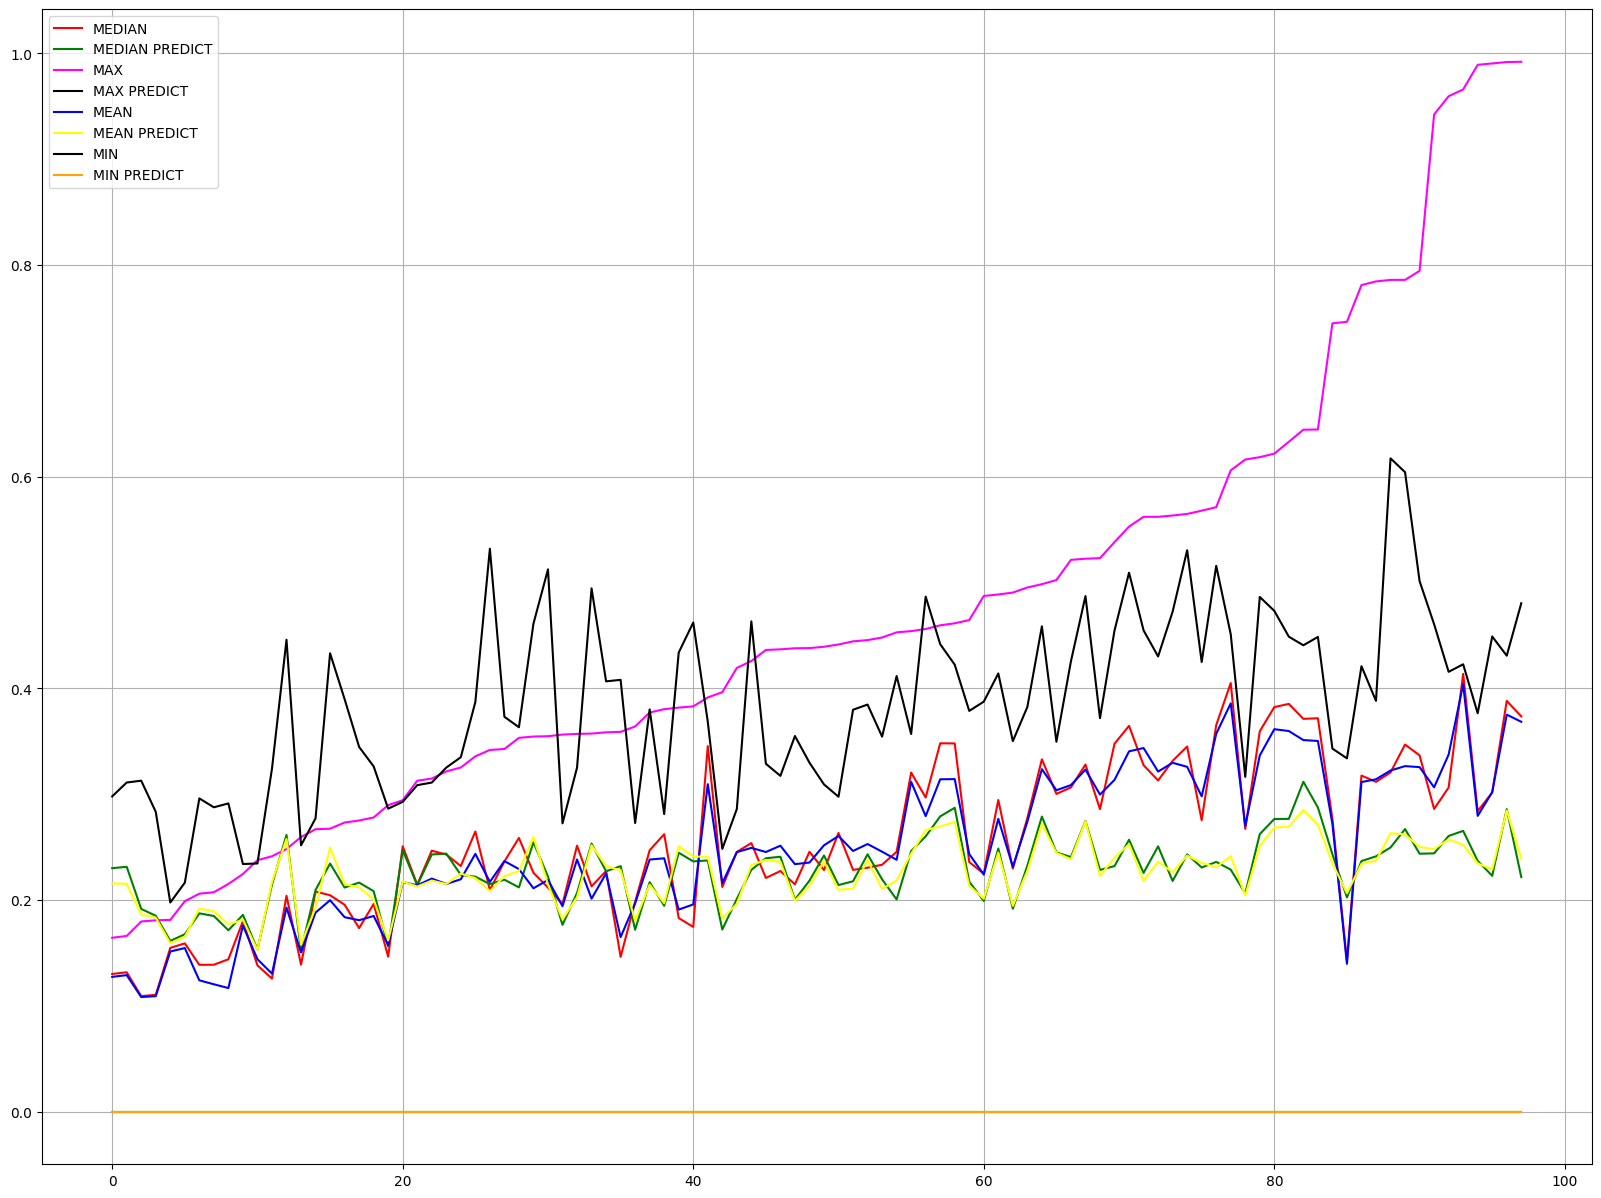

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def describe_Image(image):
    df = pd.DataFrame(np.squeeze(image).flatten()).describe()
    return df[0].to_dict()

max_values_y_test = np.array([np.max(x) for x in y_test])
sort_indices = np.argsort(max_values_y_test)

y_test_sorted = np.array(y_test)[sort_indices]
y_pre_sorted = y_pred[sort_indices]

_median = [np.median(x) for x in y_test_sorted]
_median_pre = [np.median(x) for x in y_pre_sorted]
y_des = [describe_Image(x) for x in y_test_sorted]
y_des_pre = [describe_Image(x) for x in y_pre_sorted]

# Vẽ lại biểu đồ với dữ liệu đã sắp xếp
# fig.patch.set_visible(False)  # Ẩn khung hình chính
plt.figure(figsize=(20, 15))
# Biểu đồ 1: Đường
plt.plot(range(len(y_test_sorted)), _median, label='MEDIAN', color='red')
plt.plot(range(len(y_test_sorted)), _median_pre, label='MEDIAN PREDICT', color='green')

plt.plot(range(len(y_test_sorted)), [item['max'] for item in y_des], label='MAX', color='magenta')
plt.plot(range(len(y_test_sorted)), [item['max'] for item in y_des_pre], label='MAX PREDICT', color='black')

plt.plot(range(len(y_test_sorted)), [item['mean'] for item in y_des], label='MEAN', color='blue')
plt.plot(range(len(y_test_sorted)), [item['mean'] for item in y_des_pre], label='MEAN PREDICT', color='yellow')

plt.plot(range(len(y_test_sorted)), [item['min'] for item in y_des], label='MIN', color='black')
plt.plot(range(len(y_test_sorted)), [item['min'] for item in y_des_pre], label='MIN PREDICT', color='orange')

plt.legend(loc='upper left')
plt.grid(True)

# # Biểu đồ 2: Violin
# sns.set_theme(style="ticks", palette="pastel")
# depth_values = y_test.flatten()
# depth_pre_values = y_pred.flatten()
# sns.violinplot(y=depth_values, inner="quart", ax=ax2, color='red', alpha=0.3,label='GT')
# sns.violinplot(y=depth_pre_values, inner="quart", ax=ax2, color='green', alpha=0.3, label="PREDICT")
# ax2.set_ylabel("ĐỘ SÂU")
# ax2.grid(True)
# ax2.legend()

plt.show()

In [ ]:
depth_values = None
depth_pre_values = None
y_des = None
y_pre_sorted = None
y_test_sorted = None

In [ ]:
y_pred.shape, y_test.shape

In [22]:
def VisualizeResults(index):

    pred_y = y_pred[index]

    actual_depth = y_test[index]
    pre_img = np.squeeze(pred_y)

    fig = plt.figure(figsize=(40, 10))
    gs = gridspec.GridSpec(1, 4, figure=fig)

    # Subplot 2: GT Depth
    ax2 = fig.add_subplot(gs[0, 0])
    ax2.imshow(actual_depth, 'gray')
    ax2.set_title(f'GT Depth')

    # Subplot 4: Predicted Depth
    ax5 = fig.add_subplot(gs[0, 1])
    ax5.imshow(pre_img, 'gray')
    ax5.set_title(f'Predicted Depth')

    # Subplot 5: Violin Predicted
    ax6 = fig.add_subplot(gs[0, 2])
    sns.violinplot(y=actual_depth.flatten(), inner="quart", label="GT" , color='red', ax=ax6, alpha=0.6)
    sns.violinplot(y=pre_img.flatten(), inner="quart", label='PREDICT', color='blue', ax=ax6, alpha=0.6)
    # sns.violinplot(y=abs(actual_depth.flatten() - pre_img.flatten()), inner="quart", label='DEF', alpha=0.6, color='yellow', ax=ax6)
    ax6.set_title(f'Violin frequency')
    ax6.legend()

    ax7 = fig.add_subplot(gs[0, 3])
    sns.histplot(actual_depth.flatten(), kde=True, label="GT", color='red', ax=ax7)
    sns.histplot(pre_img.flatten(), kde=True, label="PREDICT", color='blue', ax=ax7)
    # sns.histplot(np.abs(actual_depth - pre_img).flatten(), kde=True, label="DEFFERENT", alpha=0.5, color='yellow', ax=ax7)
    ax7.set_title(f'Histogram frequency')
    ax7.legend()

    plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec

for index in range(0, X_test.shape[0], X_test.shape[0]//30):
    VisualizeResults(index)

Output hidden; open in https://colab.research.google.com to view.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec # Import gridspec
import seaborn as sns # Import seaborn

def visualize_3d_histogram_depth_comparison(depth_true, depth_pred, bins=40, label=None, index=0):

    fig = plt.figure(figsize=(40, 10))
    # Define gs here within the function
    gs = gridspec.GridSpec(1, 4, figure=fig)  # Adjust the grid as needed
    # Subplot 1: Processed Image
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.imshow(depth_true, 'gray')
    ax1.set_title('Depth GT')

    # Subplot 2: GT Depth
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.imshow(depth_pred, 'gray')
    ax2.set_title(f'Depth PRED')

    # 1. Chuẩn bị dữ liệu
    depth_true_flat = depth_true.flatten()
    depth_pred_flat = depth_pred.flatten()

    # Subplot 6: Histogram
    ax7 = fig.add_subplot(gs[0, 2]) # Change subplot index if necessary
    sns.histplot(depth_true_flat, kde=True, label="GT", color='blue', ax=ax7)
    sns.histplot(depth_pred_flat, kde=True, label="PREDICT", alpha=0.3, color='red', ax=ax7)
    ax7.set_title(f'Histogram frequency')
    ax7.legend()


    ax9 = fig.add_subplot(gs[0, 3])
    sns.scatterplot(x=depth_true_flat, y=depth_pred_flat, s=20, alpha=0.4, label='GT VS PRED', ax=ax9, color='red')
    sns.scatterplot(x=depth_true_flat, y=depth_true_flat, s=20, alpha=0.4, label='GT VS GT', ax=ax9, color='blue')
    ax9.set_xlabel("Actual Depth")
    ax9.set_ylabel("Predicted Depth")
    acc = evaluate_accuracy(depth_true_flat, depth_pred_flat, threshold=0.1)
    ax9.set_title(f"Scatter Plot GT Vs PRED {np.float16(acc)}")
    ax9.grid(True)
    ax9.legend()

    # plt.savefig(f"../224_2000/cfmt_2d_model_3_epochs_{index}.png")
    plt.show()

for index in range(0, y_test.shape[0], y_test.shape[0] // 30):
    y_pre = y_pred[index]
    visualize_3d_histogram_depth_comparison(y_test[index], y_pre, label="FREQUENCY__CFMT_2D",index=index)

Output hidden; open in https://colab.research.google.com to view.

# DO CHINH XAC ACC

In [24]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def evaluate_image_similarity(real_image, predicted_image):

    # Flatten the images into 1D vectors
    real_image_flat = real_image.flatten()
    predicted_image_flat = predicted_image.flatten()

    # Ensure the input arrays are 2D for cosine_similarity
    real_image_2d = real_image_flat.reshape(1, -1)
    predicted_image_2d = predicted_image_flat.reshape(1, -1)

    # Calculate the cosine similarity
    similarity = cosine_similarity(real_image_2d, predicted_image_2d)[0][0]
    return similarity

def evaluate_accuracy(y_true, y_pred, threshold=0.0):
  diff = np.abs(y_true - y_pred)
  correct_pixels = np.sum(diff <= threshold)
  total_pixels = y_true.size # 224 * 224 = 50176
  accuracy = correct_pixels / total_pixels
  return accuracy, diff

print(f'test: {y_test.shape}')
print(f'predict: {y_pred.shape}')
threshold = 0.02
accs = []

y_pred = model.predict(X_test)
y_pred = np.squeeze(y_pred)

accs = [float(evaluate_accuracy(np.squeeze(y_test[i]), np.squeeze(y_pred[i]), threshold=threshold)[0]) for i in range(y_pred.shape[0]-1)]
print(accs)
print("Trung bình độ chính xác:", np.mean(accs), f'\nVới ngưỡng tỉ lệ sai cho phép threshold = {threshold}')

print()
accs_similar = [float(evaluate_image_similarity(np.squeeze(y_test[i]), np.squeeze(y_pred[i]))) for i in range(y_pred.shape[0]-1)]
print(accs_similar)
print("Trung bình độ chính xác cosine similar:", np.mean(accs_similar))

test: (98, 192, 256, 1)
predict: (98, 192, 256)
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
[0.24700927734375, 0.23213704427083334, 0.3276570638020833, 0.8080851236979166, 0.12666829427083334, 0.20304361979166666, 0.054850260416666664, 0.1036376953125, 0.12917073567708334, 0.031595865885416664, 0.21504720052083334, 0.9700113932291666, 0.22157796223958334, 0.18186442057291666, 0.02490234375, 0.8229573567708334, 0.11830647786458333, 0.2585042317708333, 0.92913818359375, 0.4323933919270833, 0.16092936197916666, 0.20882161458333334, 0.302001953125, 0.18845621744791666, 0.20320638020833334, 0.13535563151041666, 0.13303629557291666, 0.11692301432291667, 0.2592569986979167, 0.20163981119791666, 0.29046630859375, 0.02587890625, 0.17989095052083334, 0.04791259765625, 0.15665690104166666, 0.087890625, 0.3199259440104167, 0.16033935546875, 0.19264729817708334, 0.4278971354166667, 0.06744384765625, 0.20458984375, 0.2541910807291667, 0.23307291666666666, 0.2936808268229167, 0.16522216796875, 0.195068359

## UNRT RESNET (OURS)

In [ ]:
import numpy as np

best_index_3D, worst_index_3D = [], []

for threshold in [0.4, 0.3, 0.2, 0.1, 0.05, 0.02, 0.015, 0.01, 0.001]:
    print(f'THRESSHOD: {threshold}')
    # Tính độ chính xác cho từng ảnh
    accuracies = accs_similar = [float(evaluate_accuracy(np.squeeze(y_test[i]), np.squeeze(y_pred[i]), threshold=threshold)[0]) for i in range(y_pred.shape[0]-1)]

    # Lấy chỉ số ảnh có độ chính xác cao nhất
    best_index = np.argmax(accuracies)
    worst_index = np.argmin(accuracies)
    best_index_3D.append(best_index)
    worst_index_3D.append(worst_index)
    best_accuracy = accuracies[best_index]
    worst_accuracy = accuracies[worst_index]

    print(f"ACCURACY BEST: {best_accuracy}")

    plt.figure(figsize=(12,8))
    plt.imshow(y_test[best_index])
    plt.axis(False)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12,8))
    plt.imshow(y_pred[best_index])
    plt.axis(False)
    plt.tight_layout()
    plt.show()

    print(f"ACCURACY WORST: {worst_accuracy}")

    # plt.figure(figsize=(12,8))
    # plt.imshow(X_test[worst_index])
    # plt.axis(False)
    # plt.show()

    plt.figure(figsize=(12,8))
    plt.imshow(y_test[worst_index])
    plt.axis(False)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12,8))
    plt.imshow(y_pred[worst_index])
    plt.axis(False)
    plt.tight_layout()
    plt.show()

    for index in [best_index, worst_index]:
        y_true = y_test[index]
        mask_path = matrix_test[index, 2]

        y_pre = y_pred[index]

        img_mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)
        img_mask = cv2.resize(img_mask.copy(), (height, width), cv2.INTER_AREA)

        new_mask = np.where(img_mask.copy() > 0, 255, 0).astype(np.uint8)
        kernel = np.ones(shape=(3,3))
        new_mask = cv2.dilate(new_mask, kernel, iterations=1)

        # Tìm đường viền của các đối tượng màu trắng
        contours, hierarchy = cv2.findContours(new_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        y_true_mask = y_true.copy()
        y_pred_mask = y_pre.copy()

        print(y_true_mask.shape, y_pred_mask.shape)

        # Duyệt qua từng đường viền tìm được
        for contour in contours:
                # Lấy tọa độ và kích thước của bounding box
                x, y, w, h = cv2.boundingRect(contour)

                # Vẽ hình chữ nhật (bounding box) xung quanh đối tượng
                cv2.rectangle(y_true_mask, (x, y), (x + w, y + h), (0, 128, 0), 1) # Màu đỏ, độ dày 2
                cv2.rectangle(y_pred_mask, (x, y), (x + w, y + h), (0, 128, 0), 1) # Màu đỏ, độ dày 2

        print(f"ACCURACY WITH MASK: {accs[index]}")

        plt.figure(figsize=(12, 8))
        plt.imshow(y_true_mask)
        plt.axis(False)
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(12, 8))
        plt.imshow(y_pred_mask)
        plt.axis(False)
        plt.tight_layout()
        plt.show()

In [ ]:
best_index_3D, worst_index_3D # UNET RESNET (OURS)

## UNET RESNET (OURS)

In [ ]:
for i in [0, 186,915,893,1145,334,335]:

    index_img = i
    plt.imshow(X_test[index_img])
    plt.axis(False)
    plt.show()

    plt.imshow(y_test[index_img], cmap='gray')
    plt.axis(False)
    plt.show()

    plt.imshow(y_pred[index_img], cmap='gray')
    plt.axis(False)
    plt.show()

    plt.figure(figsize=(6,6))
    sns.violinplot(y=y_test[index_img].flatten(), inner="quart", label="GT" , color='red', alpha=0.6)
    sns.violinplot(y=y_pred[index_img].flatten(), inner="quart", label='PREDICT', color='blue', alpha=0.6)
    plt.legend()
    plt.show()

    plt.figure(figsize=(6,6))
    sns.histplot(y_test[index_img].flatten(), kde=True, label="GT", color='blue')
    sns.histplot(y_pred[index_img].flatten(), kde=True, label="PREDICT", alpha=0.3, color='red')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_test[index_img].flatten(), y=y_pred[index_img].flatten(), s=20, alpha=0.4, label='GT VS PRED', color='red')
    sns.scatterplot(x=y_test[index_img].flatten(), y=y_test[index_img].flatten(), s=20, alpha=0.4, label='GT VS GT', color='blue')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
for i in [np.int64(495),
  np.int64(499),
  np.int64(854),
  np.int64(650),
  np.int64(1079),
  np.int64(79)]:

    index_img = i
    plt.imshow(X_test[index_img])
    plt.axis(False)
    plt.show()

    plt.imshow(y_test[index_img], cmap='gray')
    plt.axis(False)
    plt.show()

    plt.imshow(y_pred[index_img], cmap='gray')
    plt.axis(False)
    plt.show()

    plt.figure(figsize=(6,6))
    sns.violinplot(y=y_test[index_img].flatten(), inner="quart", label="GT" , color='red', alpha=0.6)
    sns.violinplot(y=y_pred[index_img].flatten(), inner="quart", label='PREDICT', color='blue', alpha=0.6)
    plt.legend()
    plt.show()

    plt.figure(figsize=(6,6))
    sns.histplot(y_test[index_img].flatten(), kde=True, label="GT", color='blue')
    sns.histplot(y_pred[index_img].flatten(), kde=True, label="PREDICT", alpha=0.3, color='red')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_test[index_img].flatten(), y=y_pred[index_img].flatten(), s=20, alpha=0.4, label='GT VS PRED', color='red')
    sns.scatterplot(x=y_test[index_img].flatten(), y=y_test[index_img].flatten(), s=20, alpha=0.4, label='GT VS GT', color='blue')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import numpy as np

def evaluate_image_similarity(real_image, predicted_image):

    # Flatten the images into 1D vectors
    real_image_flat = real_image.flatten()
    predicted_image_flat = predicted_image.flatten()

    # Ensure the input arrays are 2D for cosine_similarity
    real_image_2d = real_image_flat.reshape(1, -1)
    predicted_image_2d = predicted_image_flat.reshape(1, -1)

    # Calculate the cosine similarity
    similarity = cosine_similarity(real_image_2d, predicted_image_2d)[0][0]
    return similarity

# Tính độ chính xác cho từng ảnh
accuracies = accs_similar = [float(evaluate_image_similarity(np.squeeze(y_test[i]), cv2.medianBlur(np.squeeze(y_pred[i]),3) )) for i in range(y_pred.shape[0]-1)]

# Lấy chỉ số ảnh có độ chính xác cao nhất
best_index = np.argmax(accuracies)
worst_index = np.argmin(accuracies)
best_accuracy = accuracies[best_index]
worst_accuracy = accuracies[worst_index]

print(f"SIMILAR BEST: {best_accuracy}")

# plt.figure(figsize=(12,8))
# plt.imshow(X_test[best_index])
# plt.axis(False)
# plt.show()
# y_pred[worst_index][y_pred[worst_index] > 0.93] = 0
# y_pred[worst_index][y_pred[worst_index] > 0.98] = 0
plt.figure(figsize=(12,8))
plt.imshow(y_test[best_index], cmap='gray')
plt.axis(False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,8))
plt.imshow(y_pred[best_index], cmap='gray')
plt.axis(False)
plt.tight_layout()
plt.show()

print(f"SIMILAR WORST: {worst_accuracy}")

# plt.figure(figsize=(12,8))
# plt.imshow(X_test[worst_index])
# plt.axis(False)
# plt.show()

plt.figure(figsize=(12,8))
plt.imshow(y_test[worst_index], cmap='gray')
plt.axis(False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,8))
plt.imshow(y_pred[worst_index], cmap='gray')
plt.axis(False)
plt.tight_layout()
plt.show()

for index in [best_index, worst_index]:
    y_true = y_test[index]
    mask_path = matrix_test[index, 2]

    y_pre = y_pred[index]

    img_mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)
    img_mask = cv2.resize(img_mask.copy(), (height, width), cv2.INTER_AREA)

    new_mask = np.where(img_mask.copy() > 0, 255, 0).astype(np.uint8)
    kernel = np.ones(shape=(3,3))
    new_mask = cv2.dilate(new_mask, kernel, iterations=1)

    # Tìm đường viền của các đối tượng màu trắng
    contours, hierarchy = cv2.findContours(new_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    y_true_mask = y_true.copy()
    y_pred_mask = y_pre.copy()

    print(y_true_mask.shape, y_pred_mask.shape)

    # Duyệt qua từng đường viền tìm được
    for contour in contours:
            # Lấy tọa độ và kích thước của bounding box
            x, y, w, h = cv2.boundingRect(contour)

            # Vẽ hình chữ nhật (bounding box) xung quanh đối tượng
            cv2.rectangle(y_true_mask, (x, y), (x + w, y + h), (0, 128, 0), 1) # Màu đỏ, độ dày 2
            cv2.rectangle(y_pred_mask, (x, y), (x + w, y + h), (0, 128, 0), 1) # Màu đỏ, độ dày 2

    print(f"SIMILAR WITH MASK: {accs[index]}")

    plt.figure(figsize=(12, 8))
    plt.imshow(y_true_mask)
    plt.axis(False)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.imshow(y_pred_mask)
    plt.axis(False)
    plt.tight_layout()
    plt.show()

# DANH GIA MO HINH

In [ ]:
import tensorflow as tf
import numpy as np

# Đảm bảo y_test và y_pred có shape (N, H, W)
if y_test.ndim == 4 and y_test.shape[-1] == 1:
    y_test_ = np.squeeze(y_test, axis=-1)
else:
    y_test_ = y_test

if y_pred.ndim == 4 and y_pred.shape[-1] == 1:
    y_pred_ = np.squeeze(y_pred, axis=-1)
else:
    y_pred_ = y_pred

# Tính SSIM cho từng cặp ảnh
ssim_scores = []
for i in range(y_test.shape[0]):
    img_true = y_test[i]
    img_pred = y_pred[i]
    # Ensure shape is (H, W, 1) for tf.image.ssim
    if img_true.ndim == 2:
        img_true = np.expand_dims(img_true, axis=-1)
    if img_pred.ndim == 2:
        img_pred = np.expand_dims(img_pred, axis=-1)
    ssim_val = tf.image.ssim(img_true, img_pred, max_val=1.0).numpy()
    ssim_scores.append(ssim_val)

ssim_scores = np.array(ssim_scores)
mean_ssim = np.mean(ssim_scores)
mean_ssim_loss = 1.0 - mean_ssim

print(f"Trung bình SSIM: {mean_ssim:.4f}")
print(f"Trung bình sai số SSIM (1-SSIM): {mean_ssim_loss:.4f}")

In [ ]:
import numpy as np
y_test = np.squeeze(y_test)
mse = np.mean((y_pred - y_test) ** 2)
print(f"Trung bình sai số MSE: {mse:.6f}")

In [ ]:
mae = tf.reduce_mean(np.abs(y_pred - y_test))
print(f"Trung bình sai số MAE: {mae}")

In [ ]:
import numpy as np

# Tính RMSE cho từng cặp ảnh
rmse_list = [np.sqrt(np.mean((np.squeeze(y_test[i]) - np.squeeze(y_pred[i])) ** 2)) for i in range(y_test.shape[0])]
mean_rmse = np.mean(rmse_list)

print(f"Tổng trung bình sai số RMSE: {mean_rmse:.6f}")

# DANH GIA KHOANG CACH

In [ ]:
def calculate_amd(points1, points2):
    """
    Tính Average Minimum Distance giữa hai tập điểm.

    Args:
        points1 (np.ndarray): Tập điểm thứ nhất (shape: N1 x D).
        points2 (np.ndarray): Tập điểm thứ hai (shape: N2 x D).

    Returns:
        float: Average Minimum Distance.
    """
    if len(points1) == 0 or len(points2) == 0:
        return float('inf') # Trả về vô cùng nếu một trong hai tập rỗng

    # Sử dụng cKDTree để tìm điểm gần nhất hiệu quả
    from scipy.spatial import cKDTree

    # Tính khoảng cách từ mỗi điểm trong points1 đến điểm gần nhất trong points2
    tree2 = cKDTree(points2)
    distances1_to_2, _ = tree2.query(points1)
    dist_1_to_2 = np.mean(distances1_to_2)

    # Tính khoảng cách từ mỗi điểm trong points2 đến điểm gần nhất trong points1
    tree1 = cKDTree(points1)
    distances2_to_1, _ = tree1.query(points2)
    dist_2_to_1 = np.mean(distances2_to_1)

    # Tính AMD đối xứng
    amd = (dist_1_to_2 + dist_2_to_1) / 2.0

    return amd

def image_to_points(image, threshold_depth=0.02, normalize_coords=False):
    """
    Chuyển ảnh độ sâu thành tập điểm (x, y, depth).

    Args:
        image (np.ndarray): Ảnh độ sâu (shape: H x W).
        threshold_depth (float): Ngưỡng độ sâu tối thiểu để coi là điểm hợp lệ.
        normalize_coords (bool): Có chuẩn hóa tọa độ x, y về [0, 1] không.

    Returns:
        np.ndarray: Tập điểm (N x 3), mỗi hàng là [x, y, depth].
    """
    points = []
    height, width = image.shape[:2]

    if normalize_coords:
        max_val = np.max(image) if np.max(image) > 0 else 1.0 # Tránh chia cho 0
    else:
        max_val = 1.0 # Không chuẩn hóa giá trị độ sâu nếu normalize_coords=False


    for r in range(height):
        for c in range(width):
            depth_value = image[r, c]
            if depth_value > threshold_depth:
                if normalize_coords:
                    points.append([c / (width - 1), r / (height - 1), depth_value / max_val])
                else:
                    points.append([c, r, depth_value])

    return np.array(points)

# =============================================================================
# Tính AMD cho tập test
amd_scores = []
# Chọn ngưỡng độ sâu tối thiểu cho các điểm
depth_threshold = 0.02 # Điều chỉnh ngưỡng này tùy thuộc vào dữ liệu của bạn

# y_test và y_pred đã được tải và tiền xử lý trước đó
# Đảm bảo chúng có shape (N, H, W) hoặc (N, H, W, 1) và giá trị đã được scale

# Squeeze chiều cuối nếu có
if y_test.ndim == 4 and y_test.shape[-1] == 1:
    y_test_sq = np.squeeze(y_test, axis=-1)
else:
     y_test_sq = y_test

if y_pred.ndim == 4 and y_pred.shape[-1] == 1:
    y_pred_sq = np.squeeze(y_pred, axis=-1)
else:
    y_pred_sq = y_pred

print(f"Calculating AMD for {y_test_sq.shape[0]} pairs of images...")
# Có thể giới hạn số lượng ảnh để tính toán nhanh hơn
# for i in range(min(y_test_sq.shape[0], 100)): # Ví dụ: chỉ tính cho 100 ảnh đầu tiên
for i in range(y_test_sq.shape[0]):
    if i % 50 == 0:
        print(f"Processing image {i+1}/{y_test_sq.shape[0]}")

    # Chuyển từng ảnh thành tập điểm
    points_true = image_to_points(y_test_sq[i], threshold_depth=depth_threshold, normalize_coords=False) # Chọn normalize_coords tùy ý
    points_pred = image_to_points(y_pred_sq[i], threshold_depth=depth_threshold, normalize_coords=False) # Chọn normalize_coords tùy ý

    # Tính AMD cho cặp ảnh này
    amd = calculate_amd(points_true, points_pred)
    amd_scores.append(amd)

# Tính trung bình AMD trên toàn bộ tập test
mean_amd = np.mean(amd_scores) if amd_scores else 0.0

print(f"\nTrung bình Average Minimum Distance (AMD) trên tập test: {mean_amd:.6f}")

In [ ]:
# Squeeze chiều cuối nếu có
if y_test.ndim == 4 and y_test.shape[-1] == 1:
    y_test_sq = np.squeeze(y_test, axis=-1)
else:
     y_test_sq = y_test

if y_pred.ndim == 4 and y_pred.shape[-1] == 1:
    y_pred_sq = np.squeeze(y_pred, axis=-1)
else:
    y_pred_sq = y_pred

In [ ]:
# Sử dụng scipy.spatial.distance.directed_hausdorff
from scipy.spatial.distance import directed_hausdorff
from scipy.spatial import cKDTree # Import cKDTree for efficient nearest neighbor search

def calculate_hausdorff(points1, points2):
    """
    Tính Khoảng cách Hausdorff giữa hai tập điểm.

    Args:
        points1 (np.ndarray): Tập điểm thứ nhất (shape: N1 x D).
        points2 (np.ndarray): Tập điểm thứ hai (shape: N2 x D).

    Returns:
        float: Khoảng cách Hausdorff đối xứng.
    """
    if len(points1) == 0 or len(points2) == 0:
        # Trường hợp một trong hai tập rỗng, khoảng cách Hausdorff là vô cùng
        return float('inf')

    # Tính khoảng cách Hausdorff có hướng từ points1 đến points2
    h1_to_2 = directed_hausdorff(points1, points2)[0]

    # Tính khoảng cách Hausdorff có hướng từ points2 đến points1
    h2_to_1 = directed_hausdorff(points2, points1)[0]

    # Khoảng cách Hausdorff đối xứng là giá trị lớn nhất trong hai khoảng cách có hướng
    hausdorff_dist = max(h1_to_2, h2_to_1)

    return hausdorff_dist

# =============================================================================
# Tính Hausdorff Distance cho tập test
hausdorff_scores = []
# Chọn ngưỡng độ sâu tối thiểu cho các điểm
# Sử dụng lại depth_threshold và y_test_sq, y_pred_sq từ phần tính AMD

print(f"Calculating Hausdorff Distance for {y_test_sq.shape[0]} pairs of images...")

for i in range(y_test_sq.shape[0]):
    if i % 50 == 0:
        print(f"Processing image {i+1}/{y_test_sq.shape[0]}")

    # Chuyển từng ảnh thành tập điểm
    # Quan trọng: Đối với Hausdorff Distance, bạn có thể muốn chỉ xem xét các điểm quan trọng
    # như ranh giới hoặc các điểm có giá trị độ sâu cao hơn ngưỡng.
    # Sử dụng hàm image_to_points đã định nghĩa.
    points_true = image_to_points(y_test_sq[i], threshold_depth=depth_threshold, normalize_coords=False) # Chọn normalize_coords tùy ý
    points_pred = image_to_points(y_pred_sq[i], threshold_depth=depth_threshold, normalize_coords=False) # Chọn normalize_coords tùy ý

    # Tính Hausdorff Distance cho cặp ảnh này
    # Lưu ý: directed_hausdorff yêu cầu ít nhất 2 điểm trong mỗi tập.
    if len(points_true) < 2 or len(points_pred) < 2:
        print(f"  Warning: Skipping image {i} due to insufficient points ({len(points_true)}/{len(points_pred)})")
        hausdorff_scores.append(float('inf')) # Hoặc np.nan nếu muốn bỏ qua
        continue

    try:
        hausdorff = calculate_hausdorff(points_true, points_pred)
        hausdorff_scores.append(hausdorff)
    except Exception as e:
        print(f"  Error calculating Hausdorff for image {i}: {e}")
        hausdorff_scores.append(float('inf')) # Hoặc np.nan

# Tính trung bình Hausdorff Distance (loại bỏ giá trị vô cùng nếu có)
finite_hausdorff_scores = [score for score in hausdorff_scores if score != float('inf')]

if finite_hausdorff_scores:
    mean_hausdorff = np.mean(finite_hausdorff_scores)
    print(depth_threshold)
    print(f"\nTrung bình Khoảng cách Hausdorff trên tập test ({len(finite_hausdorff_scores)}/{len(hausdorff_scores)} ảnh): {mean_hausdorff:.6f}")
else:
    print("\nKhông thể tính toán Khoảng cách Hausdorff cho bất kỳ ảnh nào.")

In [ ]:
# prompt: tính Jaccard Distance giữa y_pred và y_test

def jaccard_distance(y_true, y_pred, threshold=0.02):
    """
    Tính Jaccard Distance giữa hai ảnh (được nhị phân hóa bằng ngưỡng).

    Args:
        y_true (np.ndarray): Ảnh ground truth (shape: H x W).
        y_pred (np.ndarray): Ảnh dự đoán (shape: H x W).
        threshold (float): Ngưỡng để nhị phân hóa ảnh.

    Returns:
        float: Jaccard Distance (1 - Jaccard Index).
    """
    # Nhị phân hóa ảnh
    y_true_binary = (y_true > threshold).astype(np.uint8)
    y_pred_binary = (y_pred > threshold).astype(np.uint8)

    # Tính toán Intersection (AND) và Union (OR)
    intersection = np.logical_and(y_true_binary, y_pred_binary).sum()
    union = np.logical_or(y_true_binary, y_pred_binary).sum()

    # Tránh chia cho 0
    if union == 0:
        return 1.0 # Nếu cả hai tập rỗng, Jaccard Distance là 1

    # Tính Jaccard Index và Jaccard Distance
    jaccard_index = intersection / union
    jaccard_dist = 1.0 - jaccard_index

    return jaccard_dist

# =============================================================================
# Tính Jaccard Distance cho tập test
jaccard_scores = []
# Sử dụng lại y_test_sq và y_pred_sq đã được squeeze

print(f"Calculating Jaccard Distance for {y_test_sq.shape[0]} pairs of images...")
# Có thể điều chỉnh ngưỡng nhị phân hóa
binary_threshold = 0.02

for i in range(y_test_sq.shape[0]):
    if i % 50 == 0:
        print(f"Processing image {i+1}/{y_test_sq.shape[0]}")

    # Tính Jaccard Distance cho cặp ảnh này
    jaccard_dist = jaccard_distance(y_test_sq[i], y_pred_sq[i], threshold=binary_threshold)
    jaccard_scores.append(jaccard_dist)

# Tính trung bình Jaccard Distance trên toàn bộ tập test
mean_jaccard_dist = np.mean(jaccard_scores) if jaccard_scores else 0.0

print(f"\nTrung bình Jaccard Distance trên tập test (ngưỡng nhị phân hóa = {binary_threshold}): {mean_jaccard_dist:.6f}")


In [ ]:
# prompt: Tính Wasserstein Distance cho y_test và y_pred

!pip install pot
import ot

# Chuyển ảnh về dạng 1D histogram/distribution
# Flatten ảnh và loại bỏ các giá trị không hợp lệ (NaNs, Infs nếu có)
def image_to_distribution(image):
    flat_image = np.array(image).flatten()
    # Loại bỏ các giá trị không hợp lệ nếu có
    valid_values = flat_image[np.isfinite(flat_image)]
    # Nếu không có giá trị hợp lệ, trả về mảng rỗng hoặc xử lý theo logic của bạn
    if len(valid_values) == 0:
        return np.array([])
    # Tạo histogram hoặc chỉ sử dụng các giá trị duy nhất và tần suất của chúng
    # Để sử dụng trong ot.emd, cần có hai phân phối xác suất (tổng bằng 1)
    hist, bin_edges = np.histogram(valid_values, bins=100, density=False) # density=True để chuẩn hóa
    # Sử dụng các điểm giữa của các bin làm vị trí (locations)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
    return bin_centers, hist

wasserstein_distances = []

print(f"Calculating Wasserstein Distance for {y_test.shape[0]} pairs of images...")

# Có thể giới hạn số lượng ảnh để tính toán nhanh hơn
# for i in range(min(y_test.shape[0], 100)): # Ví dụ: chỉ tính cho 100 ảnh đầu tiên
for i in range(y_test.shape[0]):
    if i % 50 == 0:
        print(f"Processing image {i+1}/{y_test.shape[0]}")

    # Chuyển từng ảnh về phân phối
    locations_true, hist_true = image_to_distribution(y_test[i])
    locations_pred, hist_pred = image_to_distribution(y_pred[i])

    # Kiểm tra nếu một trong hai phân phối rỗng
    if len(locations_true) == 0 or len(locations_pred) == 0:
        print(f"  Warning: Skipping image {i} due to empty distribution")
        wasserstein_distances.append(np.nan) # Hoặc float('inf')
        continue

    # Tính ma trận chi phí (Cost matrix)
    # Sử dụng khoảng cách Euclidean giữa các vị trí
    try:
        cost_matrix = ot.dist(locations_true.reshape(-1, 1), locations_pred.reshape(-1, 1))

        # Tính Wasserstein Distance (Earth Mover's Distance - EMD)
        # hist_true và hist_pred phải có tổng bằng 1 để là phân phối xác suất
        # numpy.histogram với density=True đã làm điều này
        wasserstein_dist = ot.emd2(hist_true, hist_pred, cost_matrix)
        wasserstein_distances.append(wasserstein_dist)

    except Exception as e:
        print(f"  Error calculating Wasserstein distance for image {i}: {e}")
        wasserstein_distances.append(np.nan)


# Tính trung bình Wasserstein Distance (loại bỏ giá trị NaN nếu có)
finite_wasserstein_distances = [dist for dist in wasserstein_distances if not np.isnan(dist)]

if finite_wasserstein_distances:
    mean_wasserstein_dist = np.mean(finite_wasserstein_distances)
    print(f"\nTrung bình Wasserstein Distance (EMD) trên tập test ({len(finite_wasserstein_distances)}/{len(wasserstein_distances)} ảnh): {mean_wasserstein_dist:.6f}")
else:
    print("\nKhông thể tính toán Wasserstein Distance cho bất kỳ ảnh nào.")


In [ ]:
y_pred = model.predict(X_test)
y_pred = np.squeeze(y_pred)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def describe_Image(image):
    df = pd.DataFrame(np.squeeze(image).flatten()).describe()
    return df[0].to_dict()

# Giả định y_test và y_pred đã được định nghĩa từ trước
# Ví dụ:
# y_test = [np.random.rand(100) * i for i in range(1, 101)]
# y_pred = [x + np.random.randn(100) * 0.1 * i/100 for i, x in enumerate(y_test)]

# Chuyển đổi y_test và y_pred sang numpy array nếu chưa phải
y_test = np.array(y_test)
y_pred = np.array(y_pred)

max_values_y_test = np.array([np.max(x) for x in y_test])
sort_indices = np.argsort(max_values_y_test)

y_test_sorted = y_test[sort_indices]
y_pre_sorted = y_pred[sort_indices]

_median = [np.median(x) for x in y_test_sorted]
_median_pre = [np.median(x) for x in y_pre_sorted]
y_des = [describe_Image(x) for x in y_test_sorted]
y_des_pre = [describe_Image(x) for x in y_pre_sorted]

# --- Phần mới: Loại bỏ các dự đoán khác xa thực tế ---
# Xác định ngưỡng khác biệt (có thể điều chỉnh)
# Ngưỡng này có thể là một phần trăm của giá trị max thực tế, hoặc một giá trị tuyệt đối
# Ví dụ: Loại bỏ nếu sự khác biệt MAX PREDICT và MAX lớn hơn 0.2
threshold = 0.1

filtered_y_test = []
filtered_y_pred = []
retained_indices = []

for i in range(len(y_test_sorted)):
    max_test = y_des[i]['max']
    max_pre = y_des_pre[i]['max']

    # Tính toán sự khác biệt tuyệt đối giữa giá trị max thực tế và max dự đoán
    diff_max = abs(max_test - max_pre)

    # Giữ lại nếu sự khác biệt nằm trong ngưỡng chấp nhận được
    if diff_max <= threshold:
        filtered_y_test.append(y_test_sorted[i])
        filtered_y_pred.append(y_pre_sorted[i])
        retained_indices.append(i) # Lưu lại chỉ số của các mẫu được giữ lại

# Chuyển đổi danh sách đã lọc thành numpy array
filtered_y_test = np.array(filtered_y_test)
filtered_y_pred = np.array(filtered_y_pred)

print(f"Số lượng mẫu ban đầu: {len(y_test_sorted)}")
print(f"Số lượng mẫu sau khi lọc: {len(filtered_y_test)}")

# Cập nhật các danh sách thống kê với dữ liệu đã lọc để vẽ biểu đồ
_median_filtered = [np.median(x) for x in filtered_y_test]
_median_pre_filtered = [np.median(x) for x in filtered_y_pred]
y_des_filtered = [describe_Image(x) for x in filtered_y_test]
y_des_pre_filtered = [describe_Image(x) for x in filtered_y_pred]

# --- Vẽ lại biểu đồ với dữ liệu đã lọc ---
plt.figure(figsize=(20, 10))

plt.plot(range(len(filtered_y_test)), _median_filtered, label='MEDIAN (Filtered)', color='red')
plt.plot(range(len(filtered_y_test)), _median_pre_filtered, label='MEDIAN PREDICT (Filtered)', color='green')

plt.plot(range(len(filtered_y_test)), [item['max'] for item in y_des_filtered], label='MAX (Filtered)', color='magenta')
plt.plot(range(len(filtered_y_test)), [item['max'] for item in y_des_pre_filtered], label='MAX PREDICT (Filtered)', color='black')

plt.plot(range(len(filtered_y_test)), [item['mean'] for item in y_des_filtered], label='MEAN (Filtered)', color='blue')
plt.plot(range(len(filtered_y_test)), [item['mean'] for item in y_des_pre_filtered], label='MEAN PREDICT (Filtered)', color='yellow')

plt.plot(range(len(filtered_y_test)), [item['min'] for item in y_des_filtered], label='MIN (Filtered)', color='black')
plt.plot(range(len(filtered_y_test)), [item['min'] for item in y_des_pre_filtered], label='MIN PREDICT (Filtered)', color='orange')

plt.title(f'Filter images with maximum depth difference threshold: 0.1 - From {len(y_test_sorted)} images to {len(filtered_y_test)} images')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np

# Đảm bảo y_test và y_pred có shape (N, H, W)
if y_test.ndim == 4 and y_test.shape[-1] == 1:
    y_test_ = np.squeeze(y_test, axis=-1)
else:
    y_test_ = y_test

if y_pred.ndim == 4 and y_pred.shape[-1] == 1:
    y_pred_ = np.squeeze(y_pred, axis=-1)
else:
    y_pred_ = y_pred

# Tính SSIM cho từng cặp ảnh
ssim_scores = []
for i in range(y_test.shape[0]):
    img_true = y_test[i]
    img_pred = y_pred[i]
    # Ensure shape is (H, W, 1) for tf.image.ssim
    if img_true.ndim == 2:
        img_true = np.expand_dims(img_true, axis=-1)
    if img_pred.ndim == 2:
        img_pred = np.expand_dims(img_pred, axis=-1)
    ssim_val = tf.image.ssim(img_true, img_pred, max_val=1.0).numpy()
    ssim_scores.append(ssim_val)
ssim_scores = np.array(ssim_scores)
mean_ssim = np.mean(ssim_scores)
mean_ssim_loss = 1.0 - mean_ssim

print(f"Trung bình SSIM: {mean_ssim:.4f}")
print(f"Trung bình sai số SSIM (1-SSIM): {mean_ssim_loss:.4f}")
# =========================

y_test = np.squeeze(y_test)
mse = np.mean((y_pred - y_test) ** 2)
print(f"Trung bình sai số MSE: {mse:.6f}")
# =========================

mae = tf.reduce_mean(np.abs(y_pred - y_test))
print(f"Trung bình sai số MAE: {mae}")
# =========================

# Tính RMSE cho từng cặp ảnh
rmse_list = [np.sqrt(np.mean((np.squeeze(y_test[i]) - np.squeeze(y_pred[i])) ** 2)) for i in range(y_test.shape[0])]
mean_rmse = np.mean(rmse_list)
print(f"Tổng trung bình sai số RMSE: {mean_rmse:.6f}")
# =========================
